In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

In [2]:
data = np.load("/Users/sakaikeiichirou/CellTK/output/20231017-PKAKTR-SK186/df.npz",allow_pickle=True)

arr = data['arr']
labels = data['labels']
time = data['time']
labels

array([['cyto', 'RFP', 'area'],
       ['cyto', 'RFP', 'cell_id'],
       ['cyto', 'RFP', 'convex_area'],
       ['cyto', 'RFP', 'cv_intensity'],
       ['cyto', 'RFP', 'eccentricity'],
       ['cyto', 'RFP', 'major_axis_length'],
       ['cyto', 'RFP', 'max_intensity'],
       ['cyto', 'RFP', 'mean_intensity'],
       ['cyto', 'RFP', 'median_intensity'],
       ['cyto', 'RFP', 'min_intensity'],
       ['cyto', 'RFP', 'minor_axis_length'],
       ['cyto', 'RFP', 'num_seg'],
       ['cyto', 'RFP', 'orientation'],
       ['cyto', 'RFP', 'parent'],
       ['cyto', 'RFP', 'perimeter'],
       ['cyto', 'RFP', 'solidity'],
       ['cyto', 'RFP', 'std_intensity'],
       ['cyto', 'RFP', 'total_intensity'],
       ['cyto', 'RFP', 'x'],
       ['cyto', 'RFP', 'y'],
       ['nuc', 'RFP', 'area'],
       ['nuc', 'RFP', 'cell_id'],
       ['nuc', 'RFP', 'convex_area'],
       ['nuc', 'RFP', 'cv_intensity'],
       ['nuc', 'RFP', 'eccentricity'],
       ['nuc', 'RFP', 'major_axis_length'],
       [

In [3]:
cell = range(112)# 0-10 細胞
label1 = np.all((labels == 'cyto') | (labels == 'RFP') | (labels == 'mean_intensity'), axis=1)
label2 = np.all((labels == 'nuc') | (labels == 'RFP') | (labels == 'mean_intensity'), axis=1)
label3 = np.all((labels == 'cyto') | (labels == 'RFP') | (labels == 'cell_id'), axis=1)
label4 = np.all((labels == 'nuc') | (labels == 'RFP') | (labels == 'area'), axis=1)
label5 = np.all((labels == 'nuc') | (labels == 'RFP') | (labels == 'total_intensity'), axis=1)

In [4]:
df = pd.DataFrame()
for i in cell:
    tmp_nuc = arr[label2,cell,:][i,:]
    tmp_cyto = arr[label1,cell,:][i,:]
    tmp_cell_id = arr[label3,cell,:][i,:]
    tmp_area = arr[label4,cell,:][i,:]
    tmp_total_intensity = arr[label5,cell,:][i,:]
    tmp = pd.DataFrame([tmp_nuc,tmp_cyto,tmp_cell_id,tmp_area,tmp_total_intensity],index=["nuc","cyto","cell_id_CellTK","nuc_area","nuc_intensity"]).T
    tmp["c/n"] = tmp_cyto/tmp_nuc
    tmp["cell_id"] = np.full(721,i)
    tmp["time"] = np.arange(721)
    tmp_cyto_notna = tmp["cyto"][tmp["cyto"].notna()].reset_index(drop=True)
    tmp["cyto_norm"] = tmp["cyto"]/tmp_cyto_notna[0]
    df = pd.concat([df,tmp])
display(df)

df_2 = df.reset_index(drop=True)
df_2["sav"] = savgol_filter(df_2["nuc_area"],5,2)
display(df_2)

nuc         cyto  cell_id_CellTK  nuc_area  nuc_intensity  \
0    806.933105   965.106140             1.0      89.0   71817.046875   
1    835.155212  1029.232056             1.0      97.0   81010.054688   
2    826.191711  1029.459229             1.0      96.0   79314.406250   
3    849.831665   969.719482             1.0      91.0   77334.679688   
4    857.407349  1030.289551             1.0      98.0   84025.921875   
..          ...          ...             ...       ...            ...   
716  743.942627   750.943054           123.0      64.0   47612.328125   
717  805.722534   760.551636           123.0      77.0   62040.632812   
718  799.094910   773.969727           123.0      77.0   61530.308594   
719  775.818359   698.629456           123.0      72.0   55858.921875   
720  777.837646   704.703064           123.0      72.0   56004.312500   

          c/n  cell_id  time  cyto_norm  
0    1.196018        0     0   1.000000  
1    1.232384        0     1   1.066444  
2    1.246029        0     2   1.066680  
3    1.141072        0     3   1.004780  
4    1.201634        0     4   1.067540  
..        ...      ...   ...        ...  
716  1.009410      111   716   0.994571  
717  0.943937      111   717   1.007297  
718  0.968558      111   718   1.025069  
719  0.900506      111   719   0.925286  
720  0.905977      111   720   0.933330  

[80752 rows x 9 columns]

nuc         cyto  cell_id_CellTK  nuc_area  nuc_intensity  \
0      806.933105   965.106140             1.0      89.0   71817.046875   
1      835.155212  1029.232056             1.0      97.0   81010.054688   
2      826.191711  1029.459229             1.0      96.0   79314.406250   
3      849.831665   969.719482             1.0      91.0   77334.679688   
4      857.407349  1030.289551             1.0      98.0   84025.921875   
...           ...          ...             ...       ...            ...   
80747  743.942627   750.943054           123.0      64.0   47612.328125   
80748  805.722534   760.551636           123.0      77.0   62040.632812   
80749  799.094910   773.969727           123.0      77.0   61530.308594   
80750  775.818359   698.629456           123.0      72.0   55858.921875   
80751  777.837646   704.703064           123.0      72.0   56004.312500   

            c/n  cell_id  time  cyto_norm        sav  
0      1.196018        0     0   1.000000  90.942857  
1      1.232384        0     1   1.066444  93.428571  
2      1.246029        0     2   1.066680  95.057143  
3      1.141072        0     3   1.004780  94.428571  
4      1.201634        0     4   1.067540  94.571429  
...         ...      ...   ...        ...        ...  
80747  1.009410      111   716   0.994571        NaN  
80748  0.943937      111   717   1.007297  72.628571  
80749  0.968558      111   718   1.025069  76.828571  
80750  0.900506      111   719   0.925286  75.714286  
80751  0.905977      111   720   0.933330  70.171429  

[80752 rows x 10 columns]

In [5]:
#NaNのカウント
lists = []
for i in range(721):
    df_tmp = df_2[df_2["time"]==i]
    NaN_count = df_tmp["c/n"].isnull().sum()
    lists.append(NaN_count)
max(lists)

#細胞数を661にしているので、1-361minまでのいずれのタイムポイントでもn=161は取れている

106

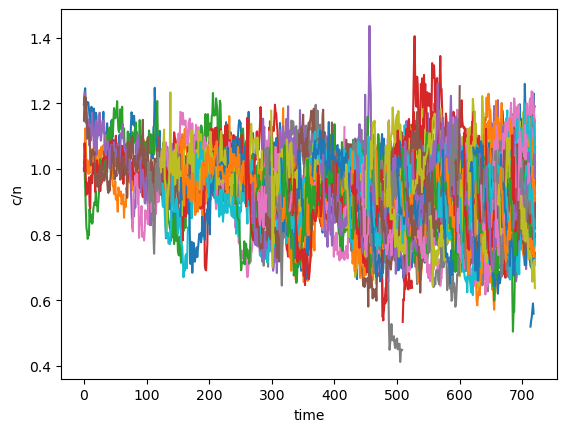

In [6]:
for i in df_2['cell_id'].unique():
    sns.lineplot(data=df_2[df_2['cell_id']==i], x="time", y="c/n")

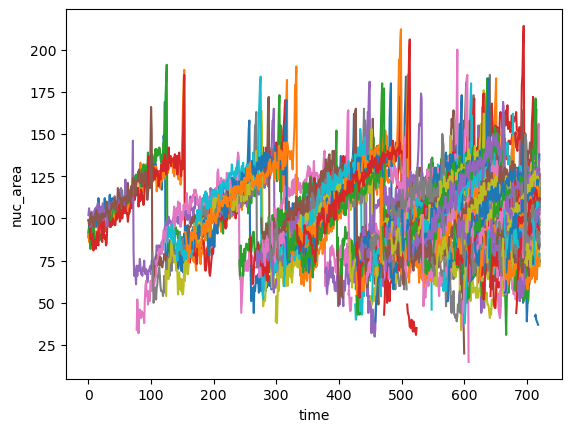

In [7]:
#核の面積で分裂タイミングがわかりそう
for i in df_2['cell_id'].unique():
    x = sns.lineplot(data=df_2[df_2['cell_id']==i], x="time", y="nuc_area")

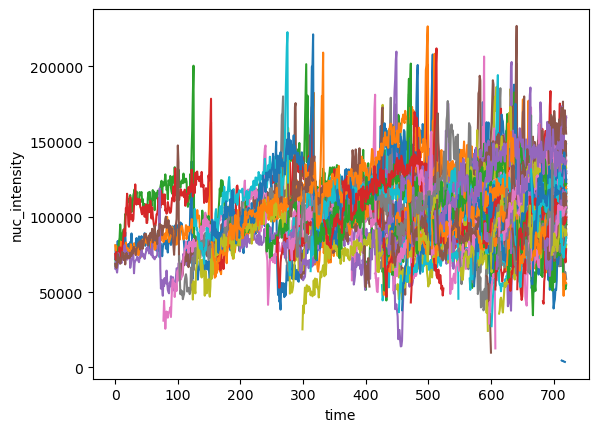

In [8]:
#核のtotal intenisityで分裂タイミングを推定するのは難しそう
for i in df_2['cell_id'].unique():
    x = sns.lineplot(data=df_2[df_2['cell_id']==i], x="time", y="nuc_intensity")

KeyError: 'y'

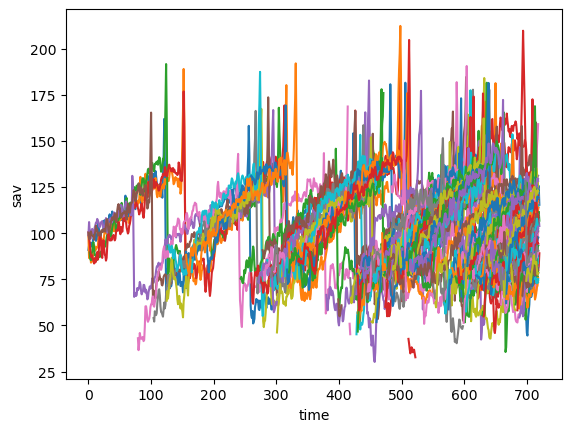

In [9]:
#核の面積のデータをスムージング by Savitzky-Golay filter
for i in df_2['cell_id'].unique():
    sns.lineplot(data=df_2[df_2['cell_id']==i], x="time", y="sav")

[121, 256, 423, 586, 719]


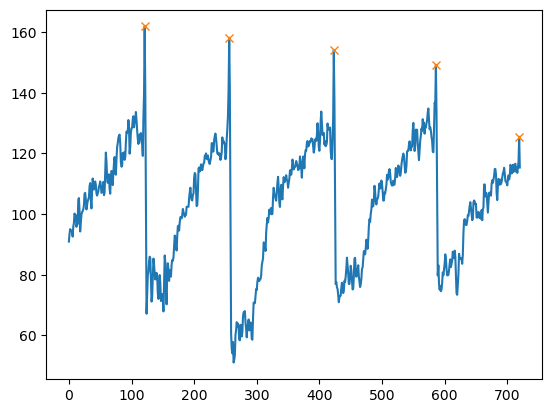

In [10]:
#cell id=0のcell areaを定量
data_cell_id_0 = df_2[df_2["cell_id"]==0].reset_index(drop=True)
x = data_cell_id_0["time"].reset_index(drop=True)
y = data_cell_id_0["sav"].reset_index(drop=True)
plt.plot(x,y)

peaks, _ = find_peaks(y, distance=120)
list_tmp = []
for l in peaks:
    if data_cell_id_0["sav"][data_cell_id_0["time"]==l].values > 120:
        list_tmp.append(l)
print(list_tmp)
    
plt.plot(list_tmp, y[list_tmp], "x")
plt.savefig("20231017-nuclear-area-cell-id-0.pdf")

0
[121, 256, 423, 586, 719]


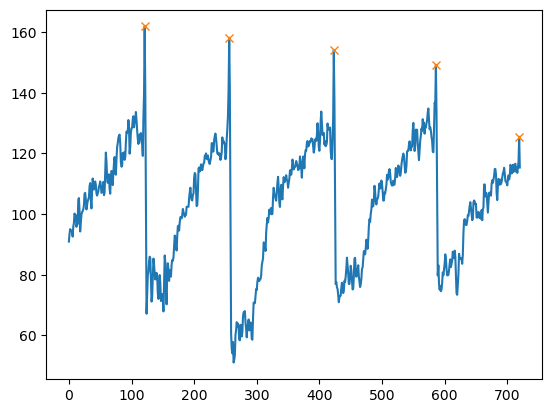

1
[152, 316, 477]


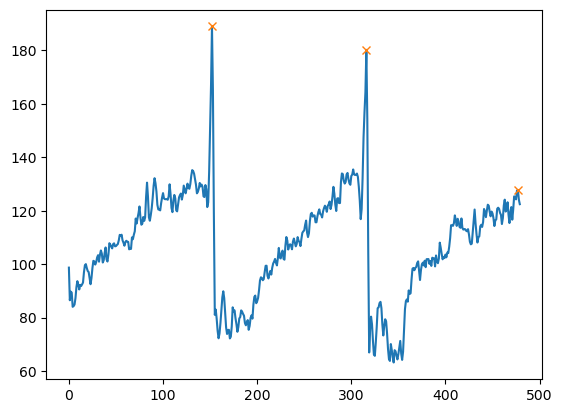

2
[124, 304, 468, 623]


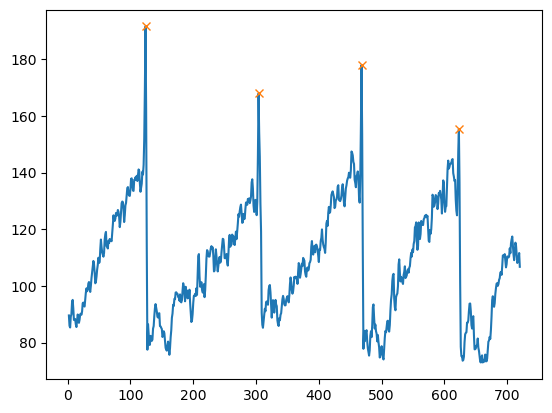

3
[152, 313, 498, 709]


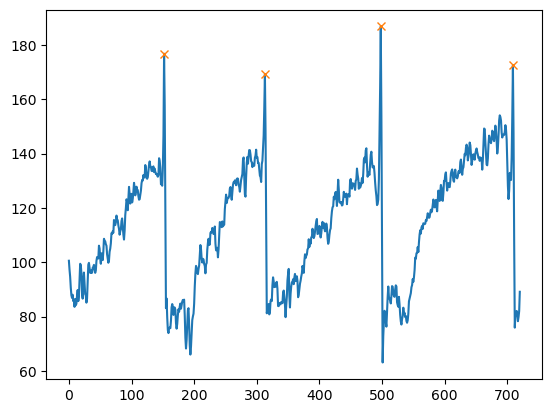

4
[70, 295, 442, 624]


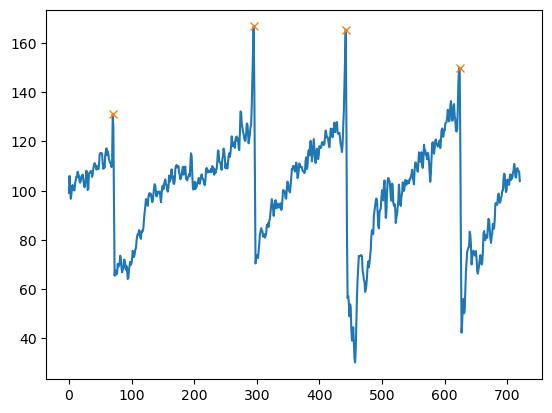

5
[100, 287, 454, 603]


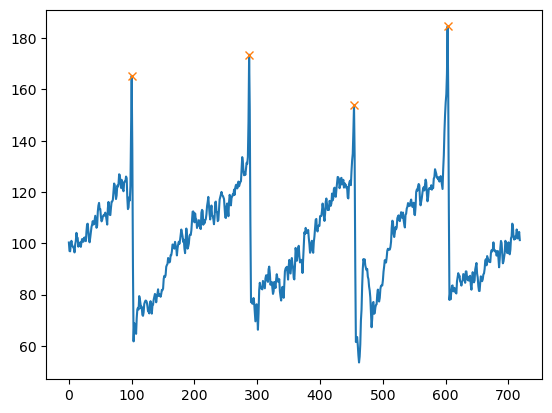

6
[239, 376, 588]


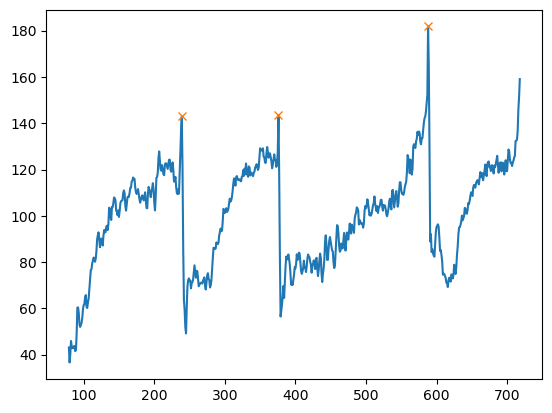

7
[267, 448, 614]


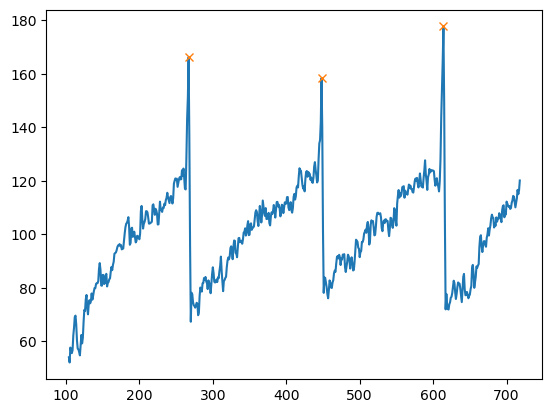

8
[276, 426, 608]


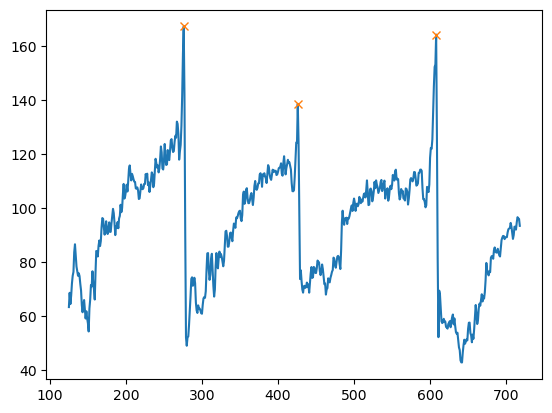

9
[274, 434, 610]


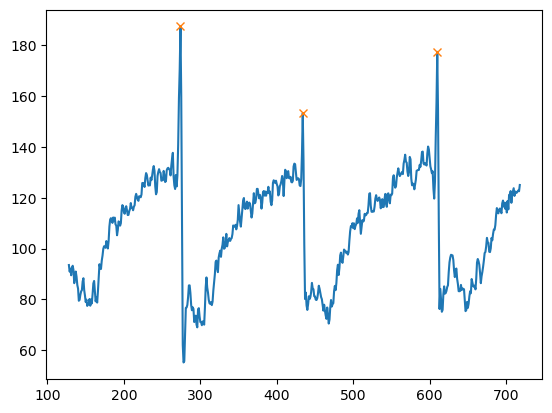

10
[315, 506, 654]


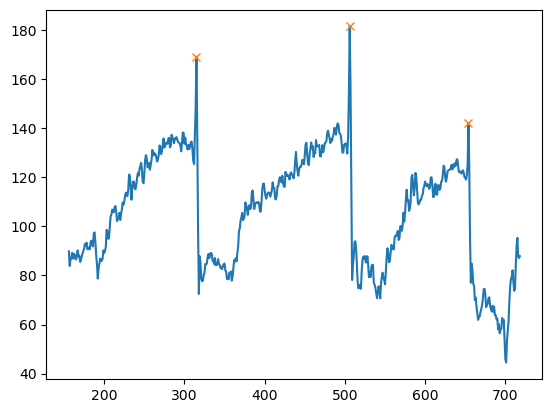

11
[331, 498, 650]


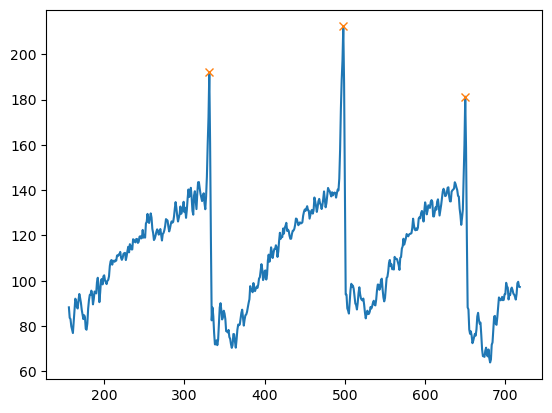

12
[395, 564, 717]


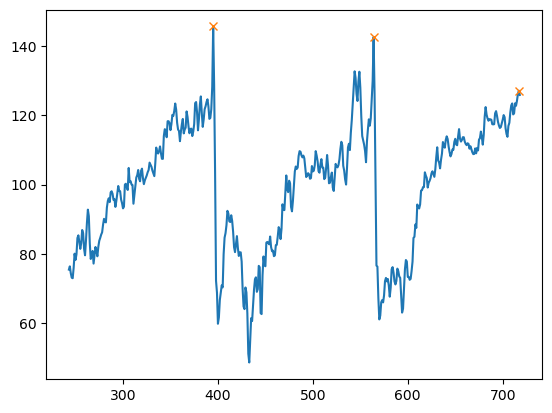

13
[426, 615]


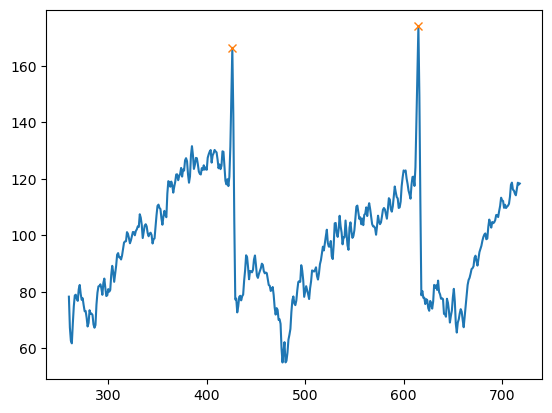

14
[448, 689]


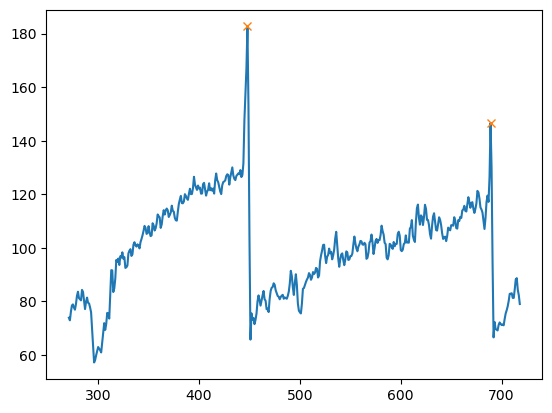

15
[426, 582, 714]


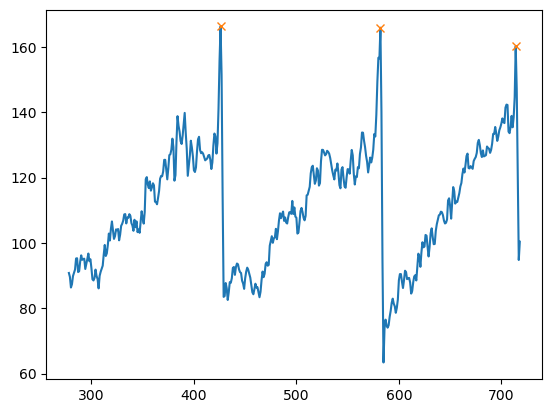

16
[405]


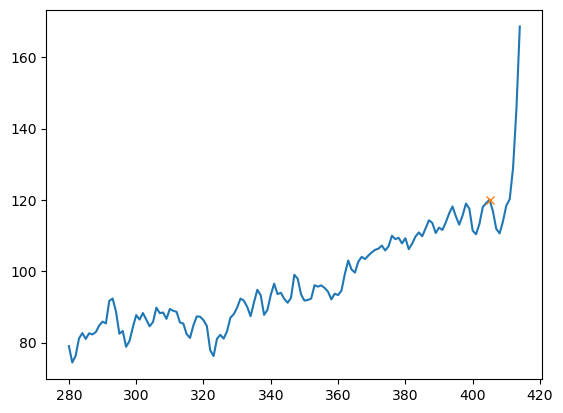

17
[439]


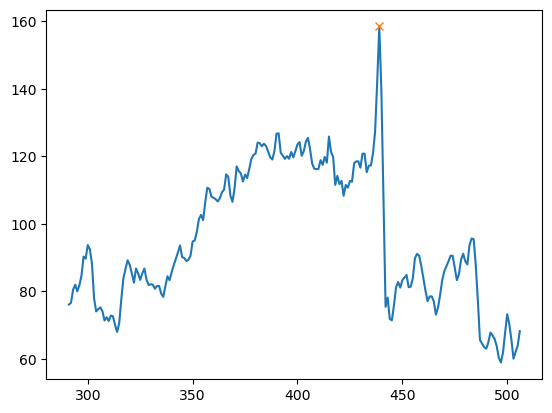

18
[451, 591]


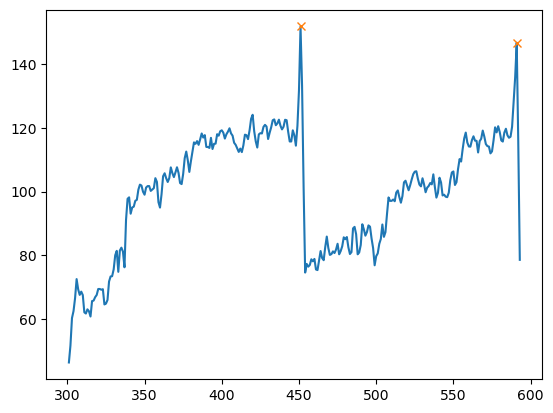

19
[438]


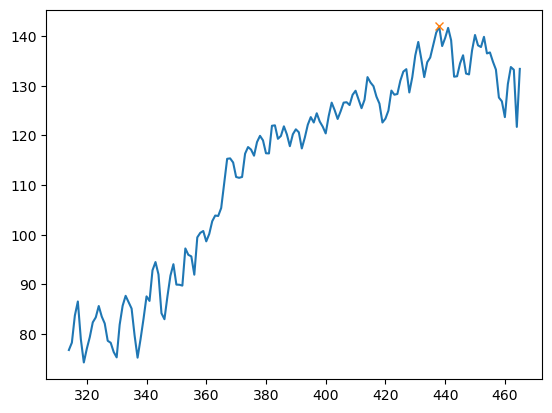

20
[482, 638]


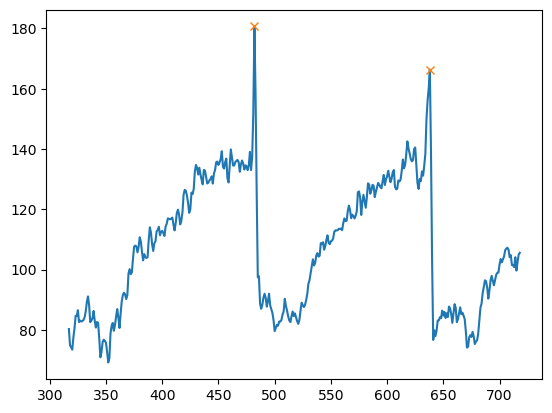

21
[509, 659]


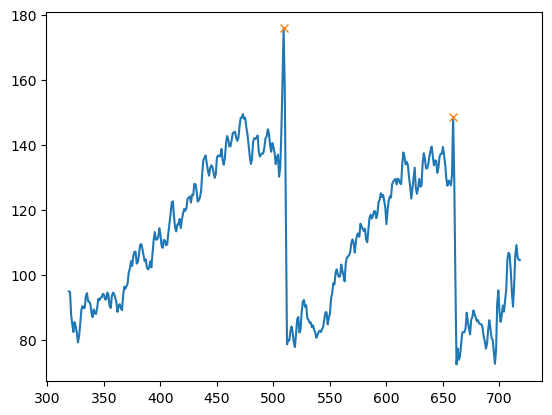

22
[463]


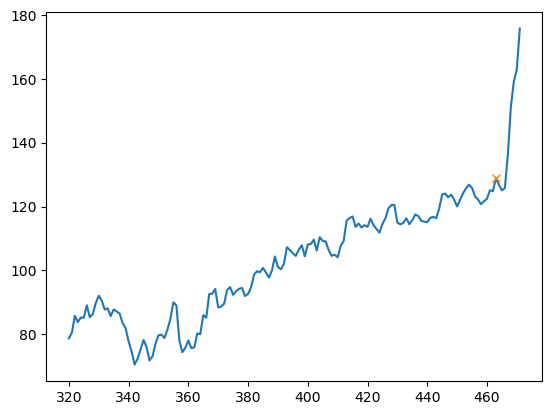

23
[512, 694]


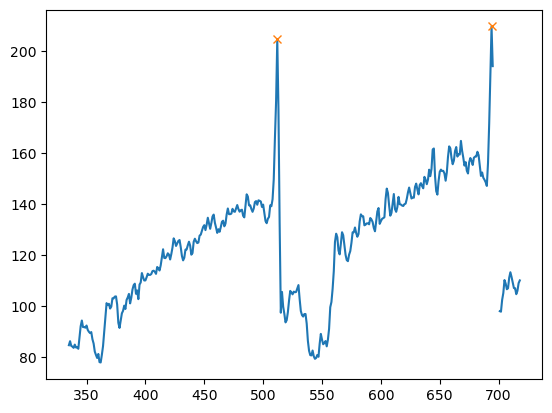

24
[531, 714]


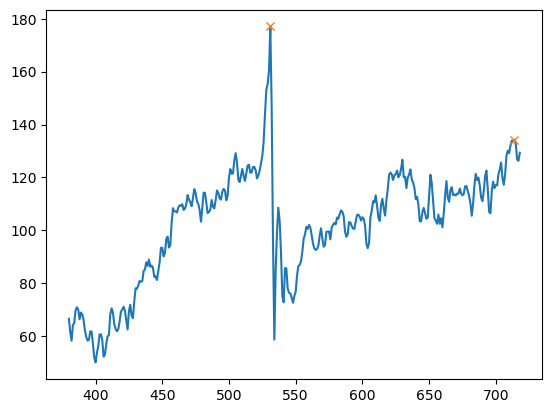

25
[]


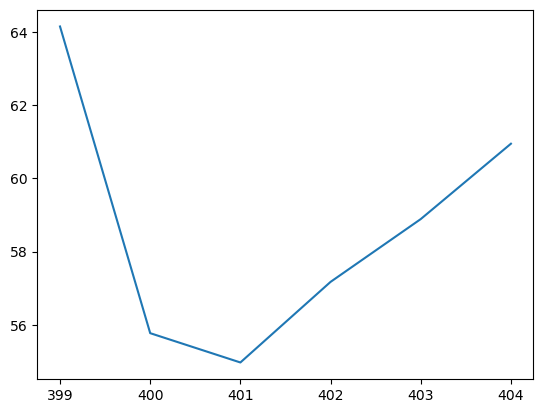

26
[]


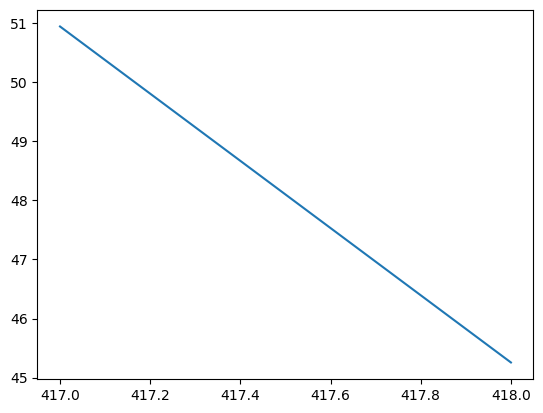

27
[]


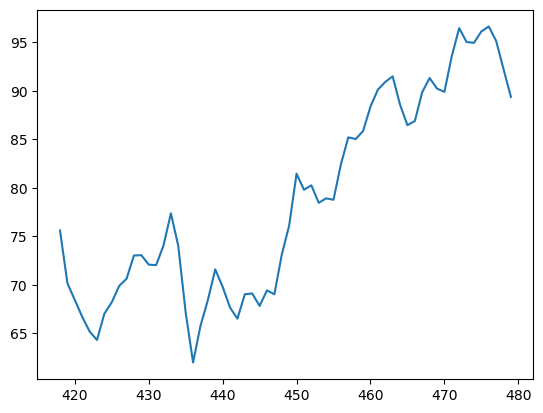

28
[577, 717]


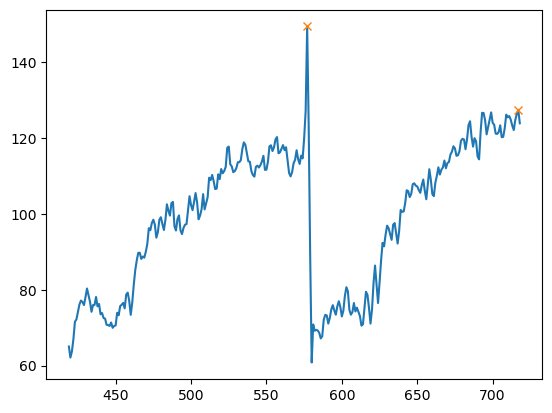

29
[]


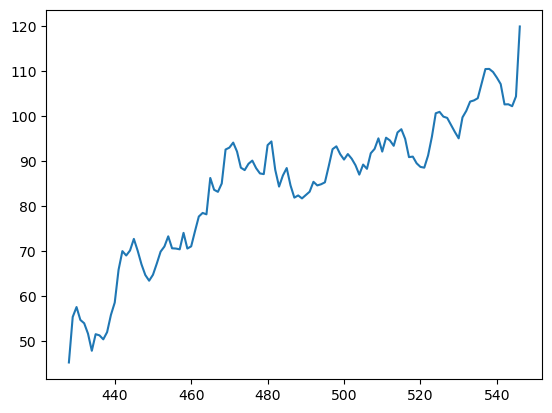

30
[592, 714]


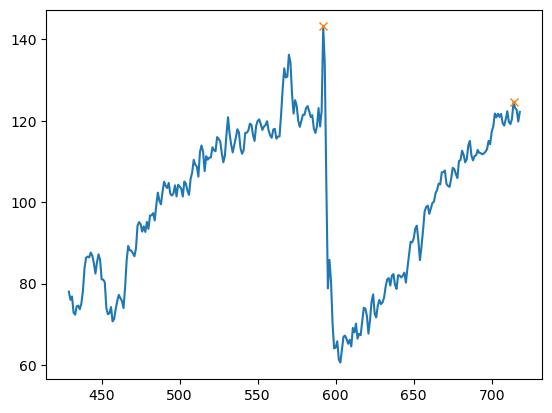

31
[636]


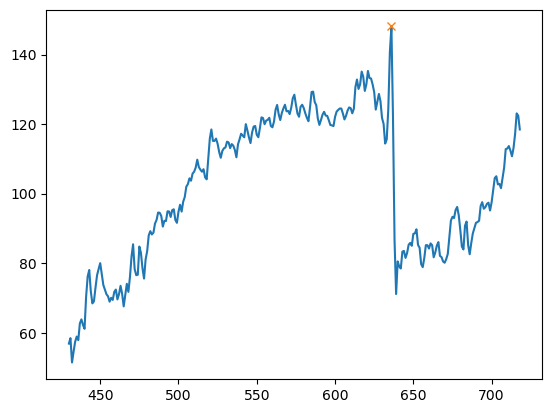

32
[625]


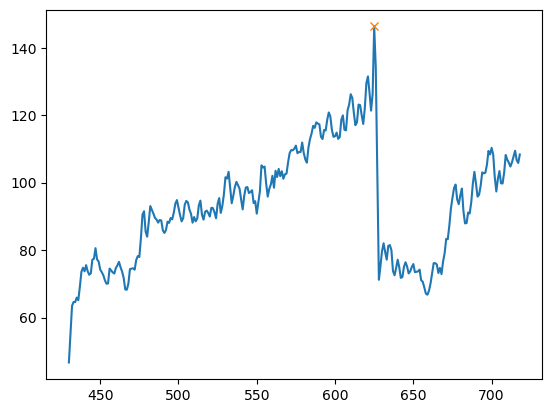

33
[610]


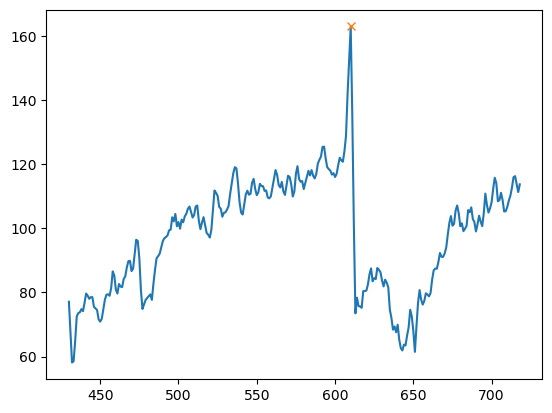

34
[607]


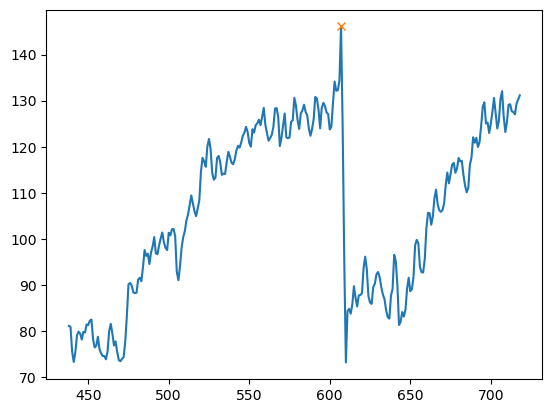

35
[652]


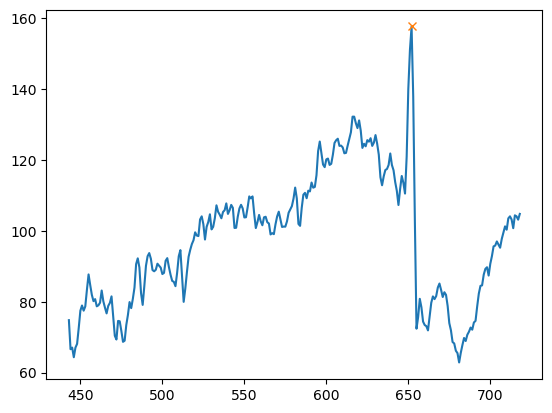

36
[604]


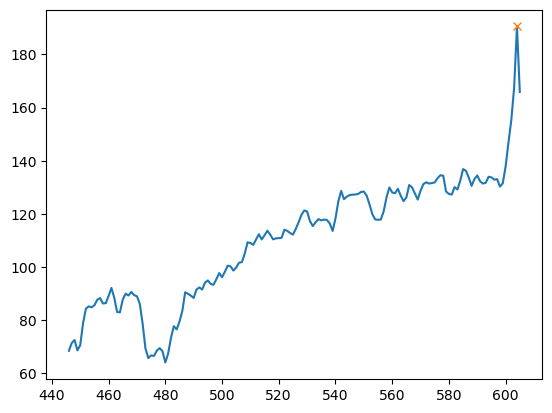

37
[640]


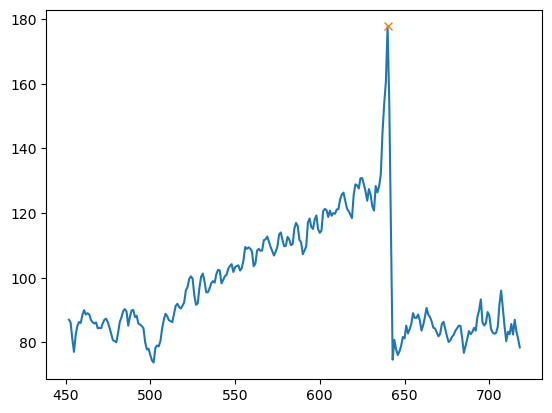

38
[632]


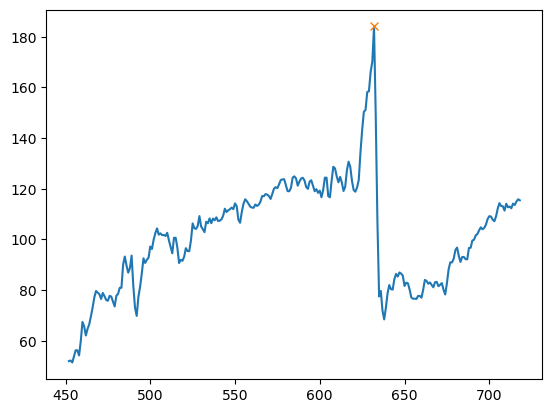

39
[611]


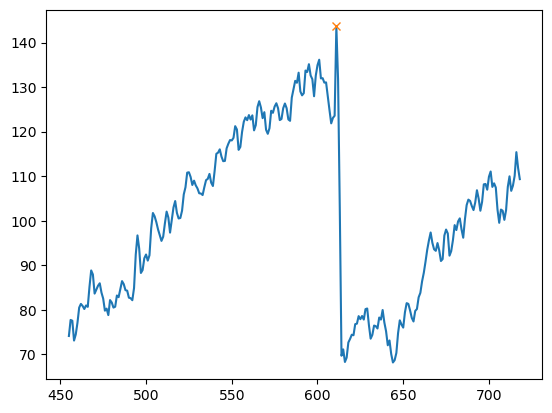

40
[595, 717]


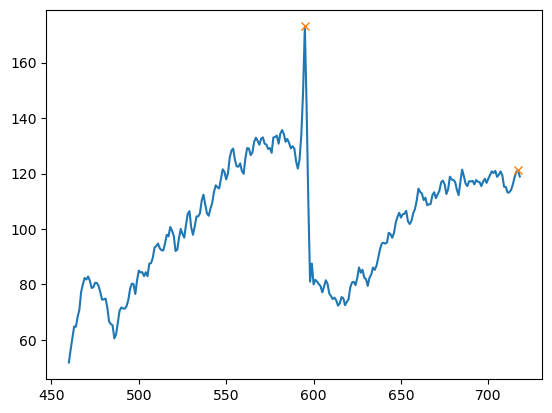

41
[634]


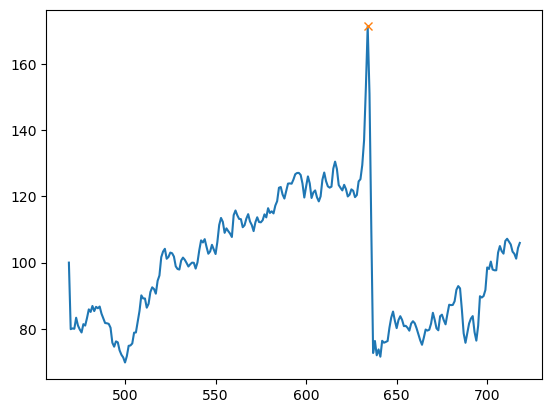

42
[636]


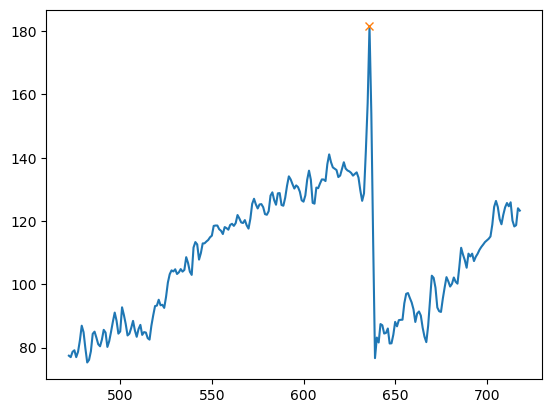

43
[630]


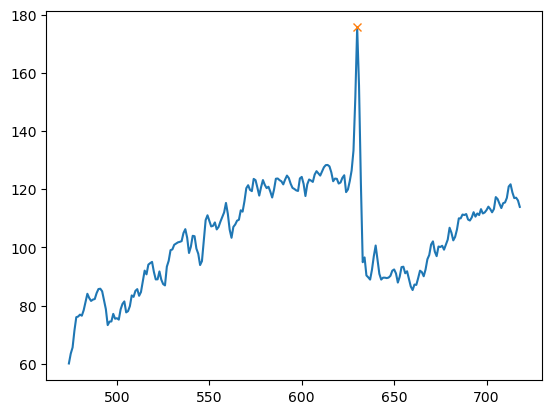

44
[632]


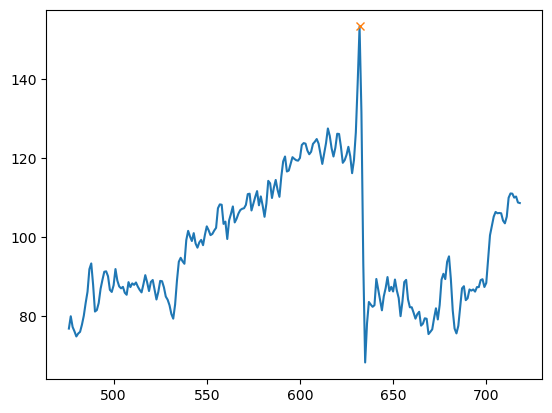

45
[640]


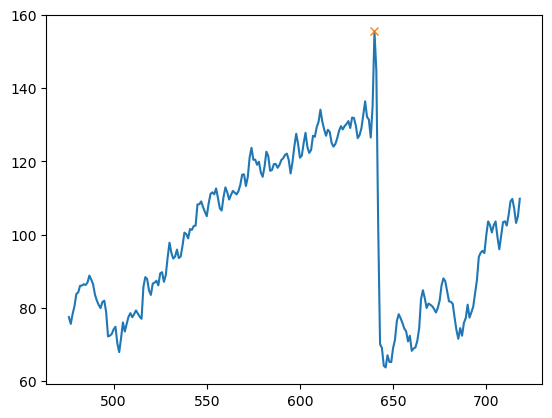

46
[504, 663]


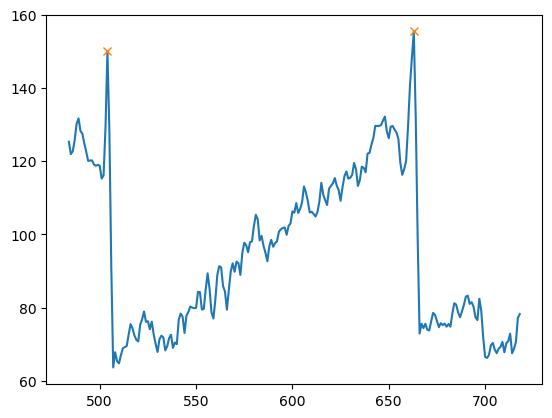

47
[566, 710]


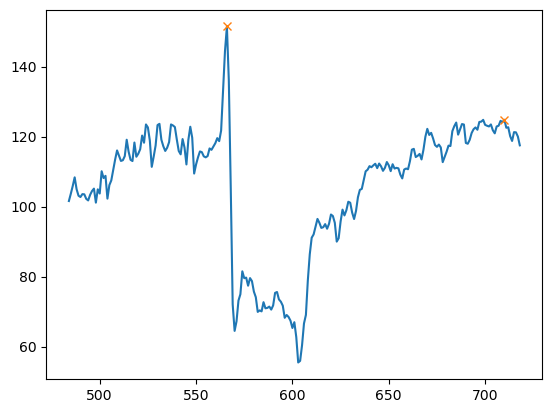

48
[631]


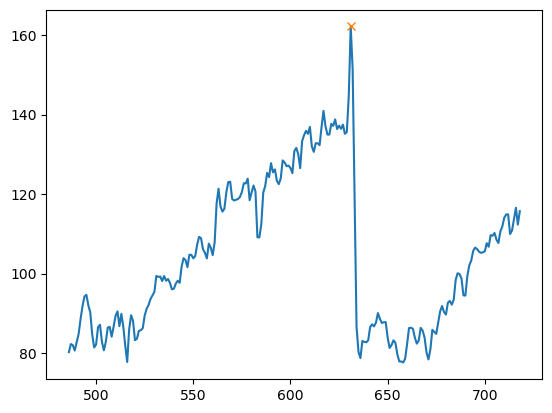

49
[677]


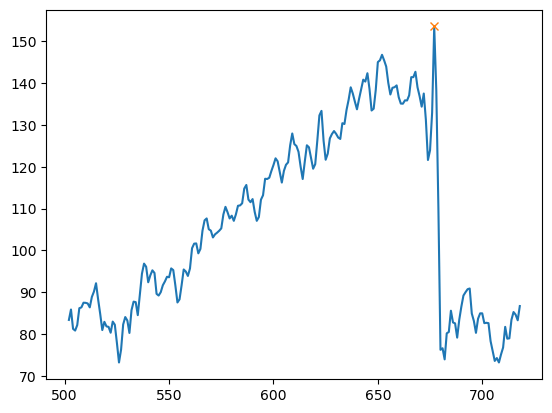

50
[639]


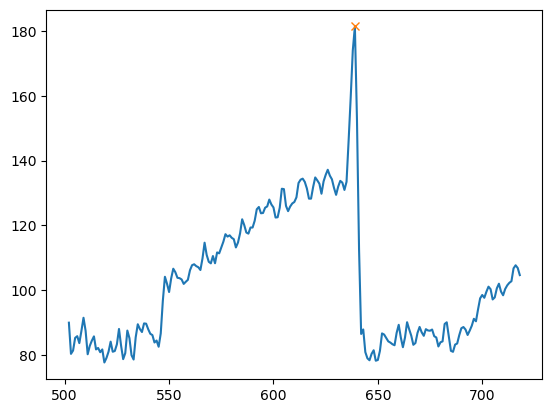

51
[678]


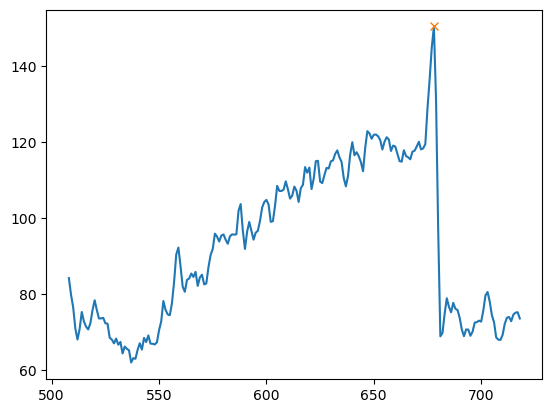

52
[663]


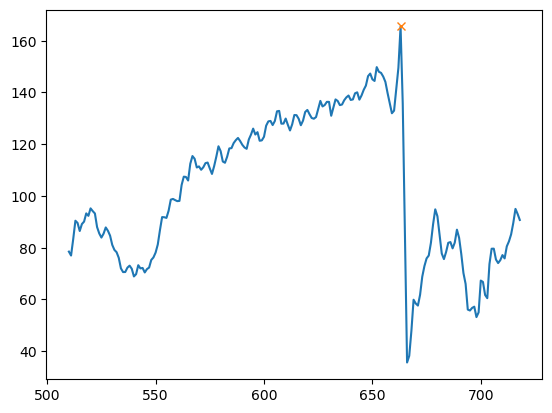

53
[]


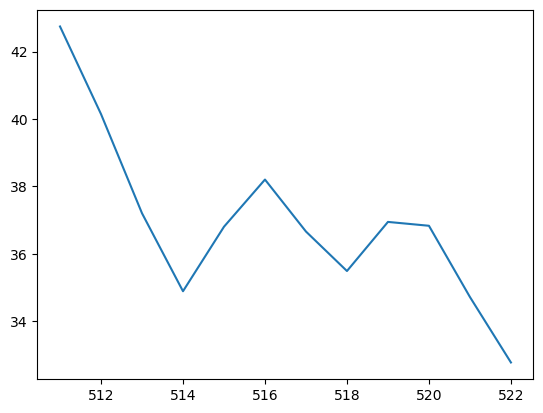

54
[662]


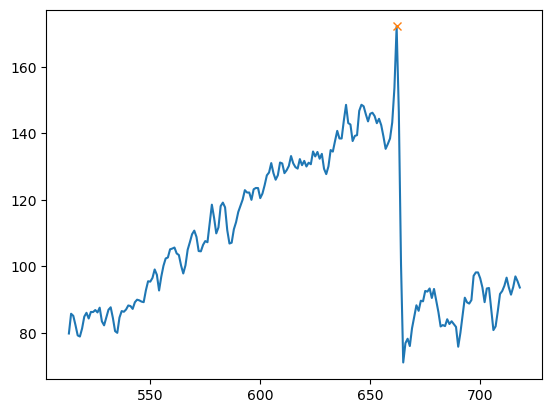

55
[692]


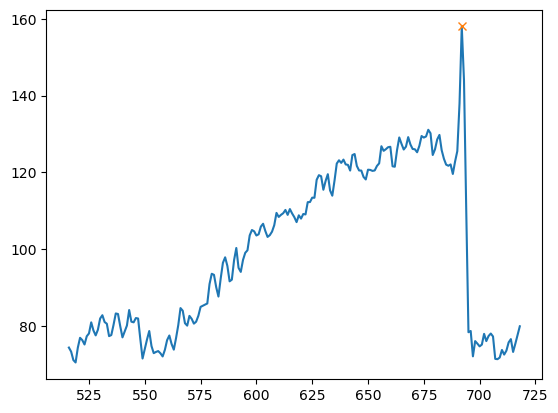

56
[]


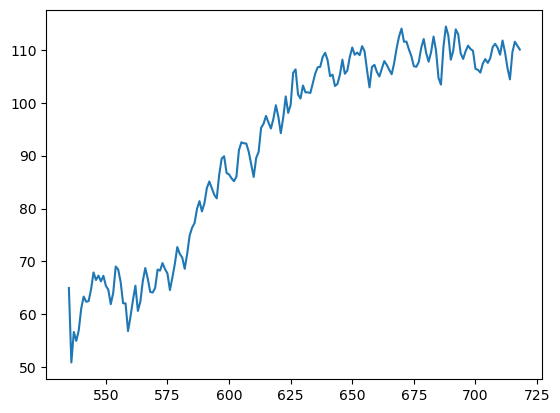

57
[]


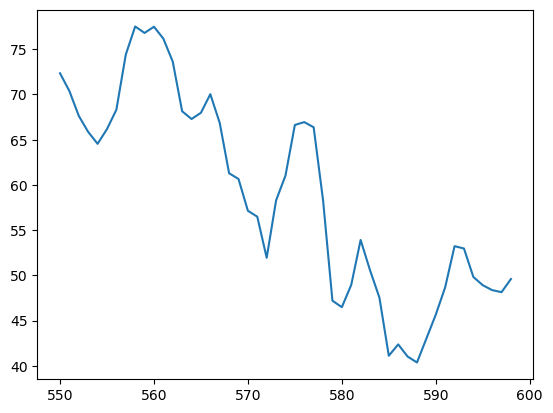

58
[715]


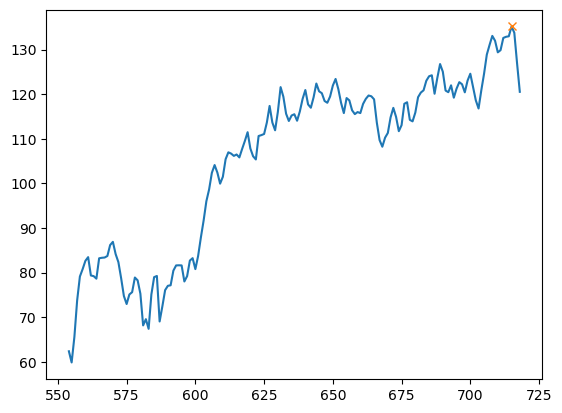

59
[689]


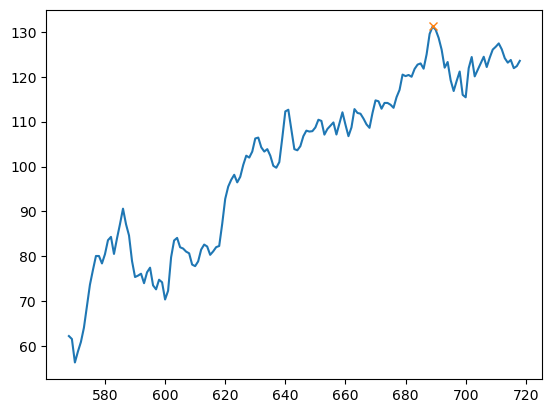

60
[713]


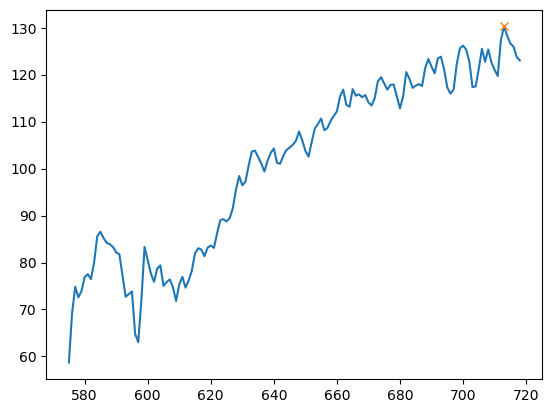

61
[709]


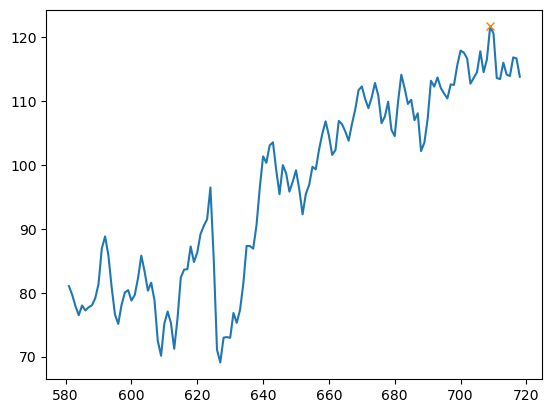

62
[]


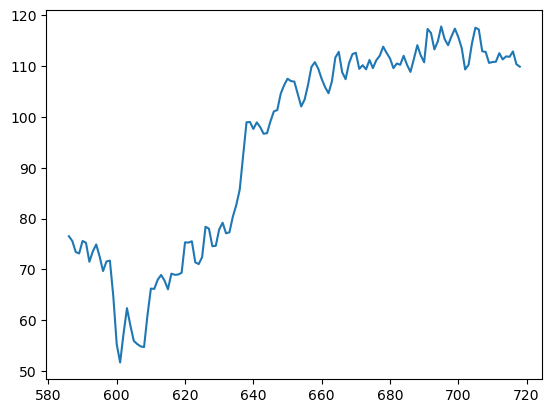

63
[]


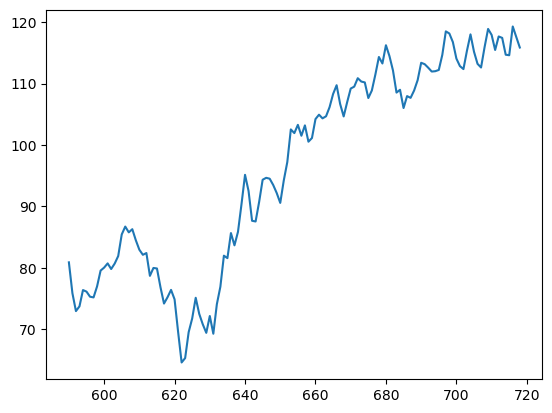

64
[700]


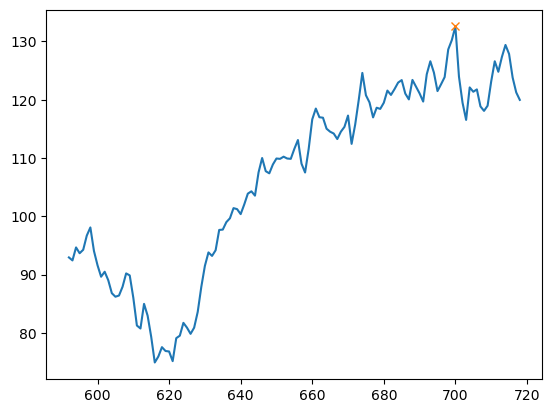

65
[]


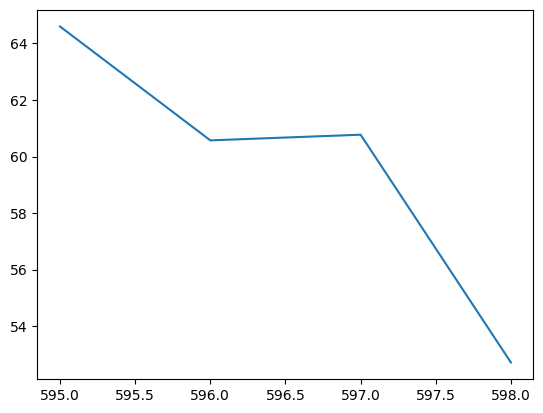

66
[713]


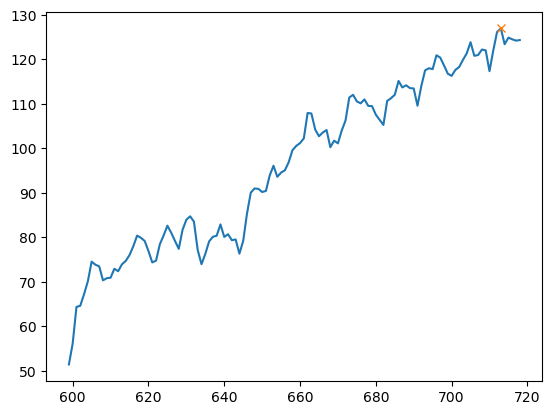

67
[710]


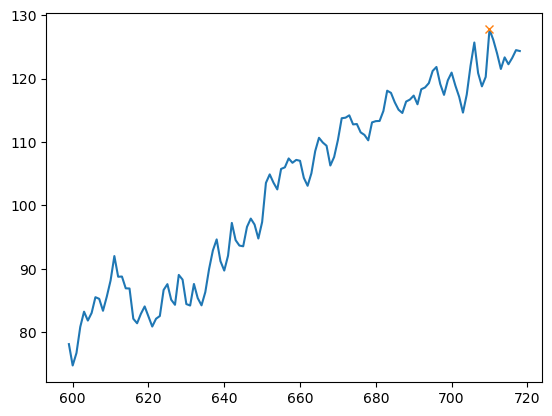

68
[685]


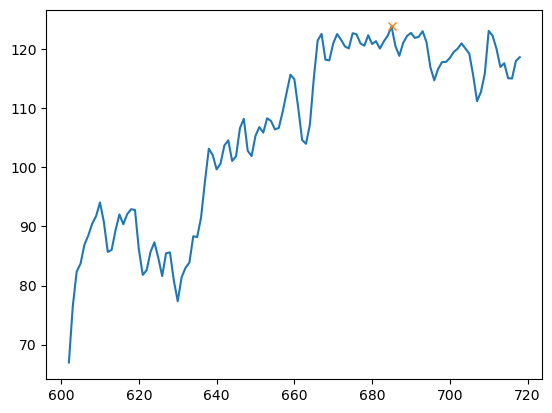

69
[698]


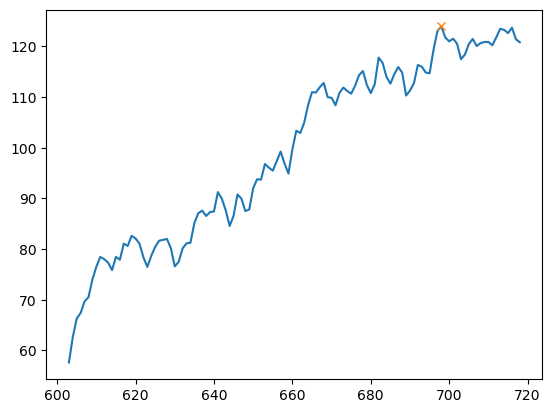

70
[694]


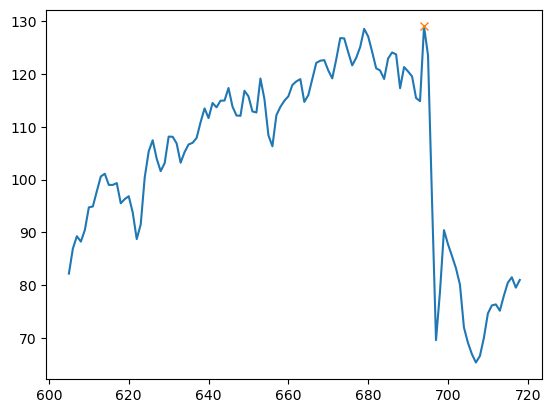

71
[714]


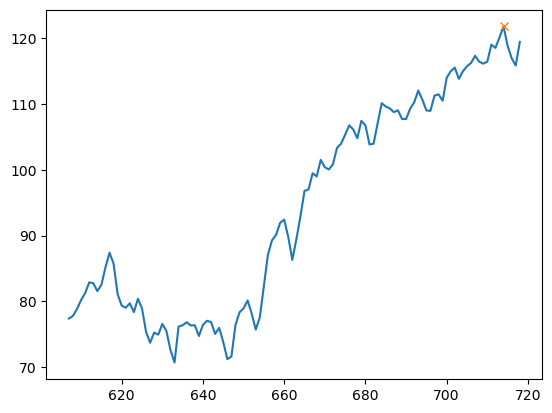

72
[713]


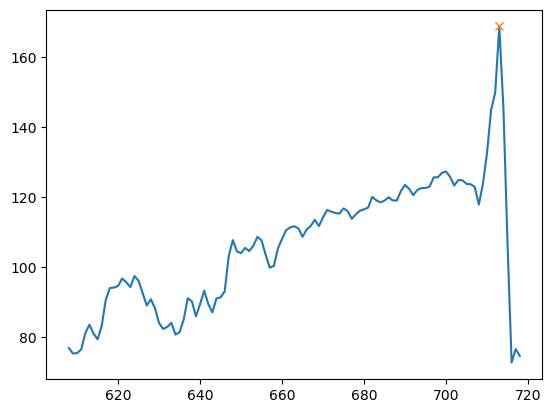

73
[709]


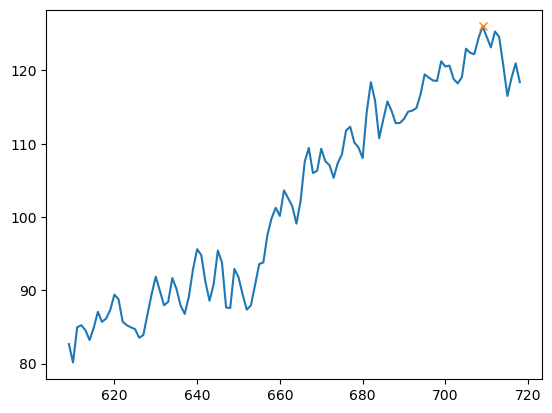

74
[717]


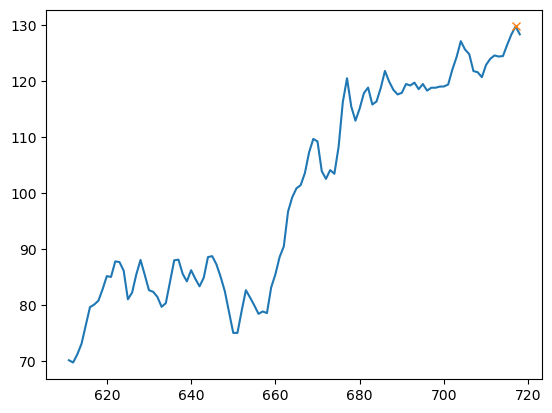

75
[697]


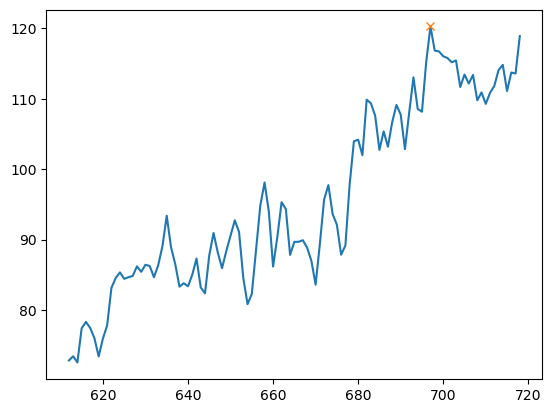

76
[707]


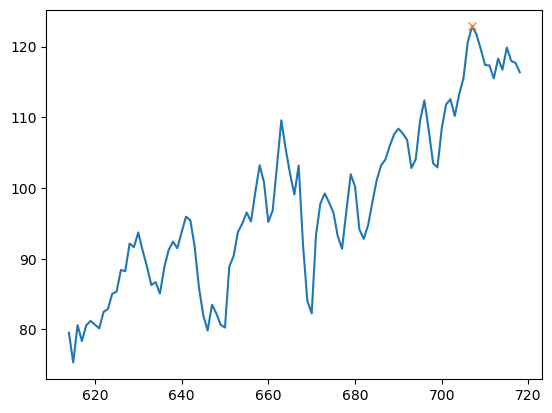

77
[]


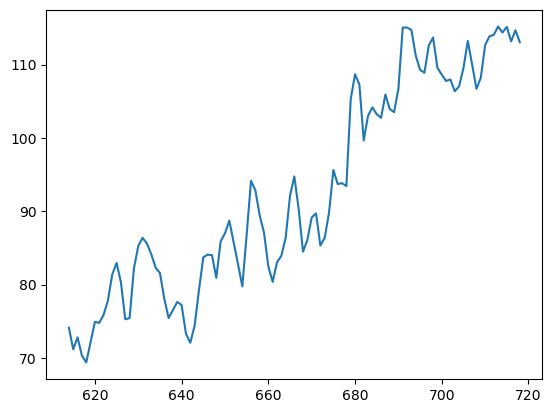

78
[]


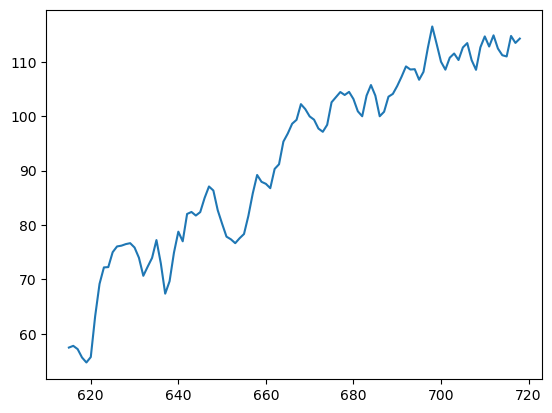

79
[]


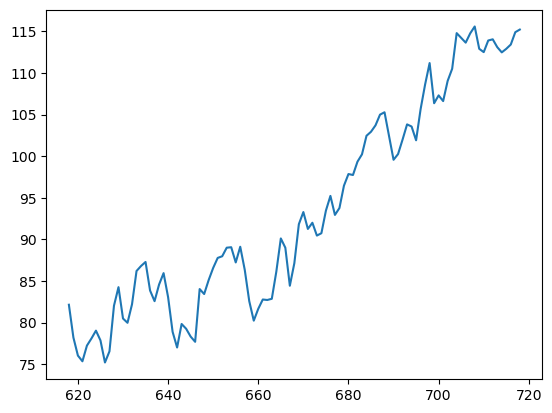

80
[]


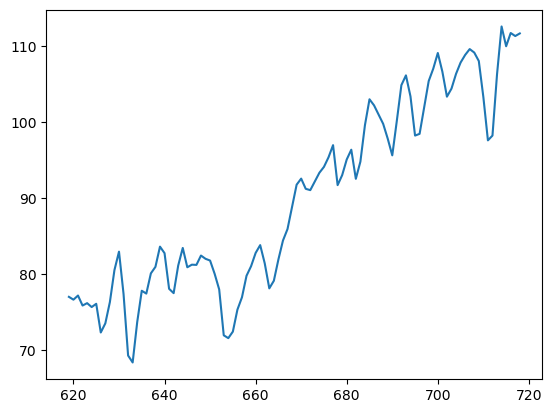

81
[]


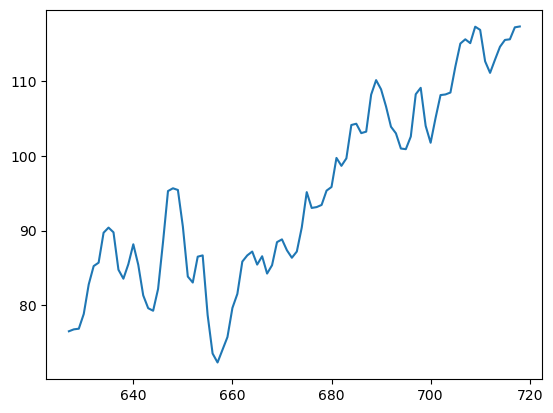

82
[]


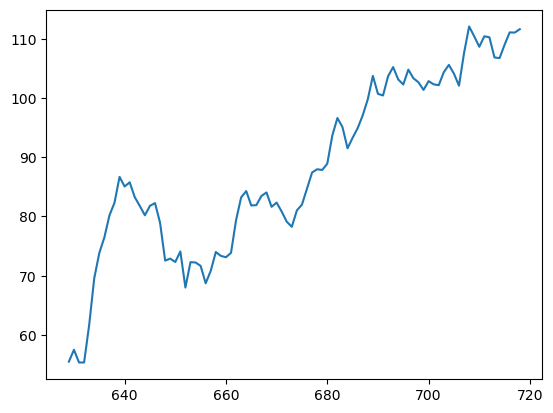

83
[]


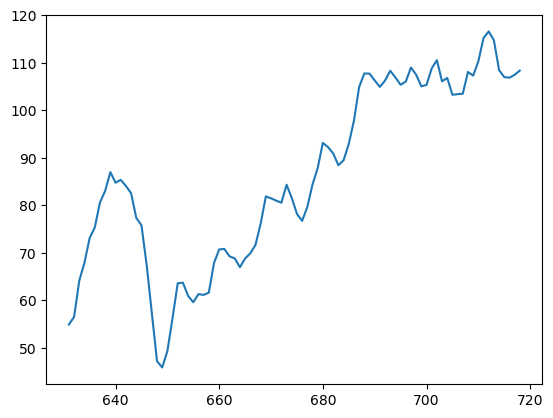

84
[711]


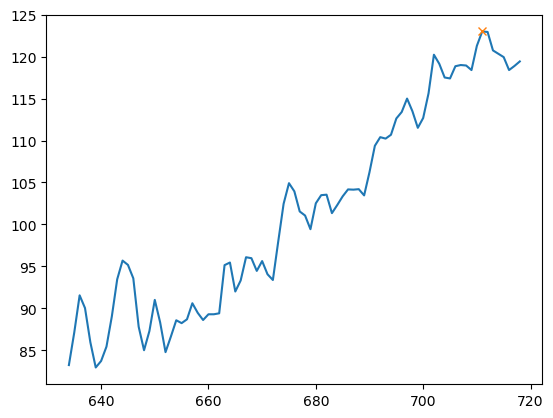

85
[]


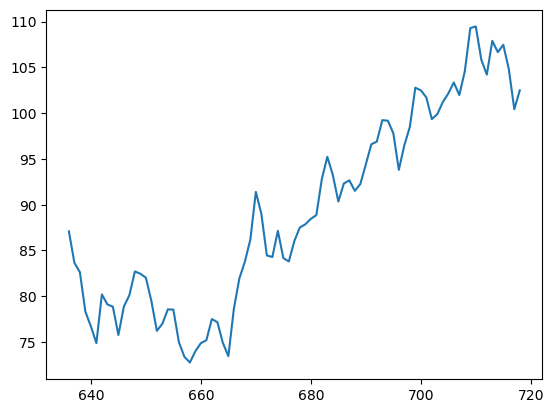

86
[]


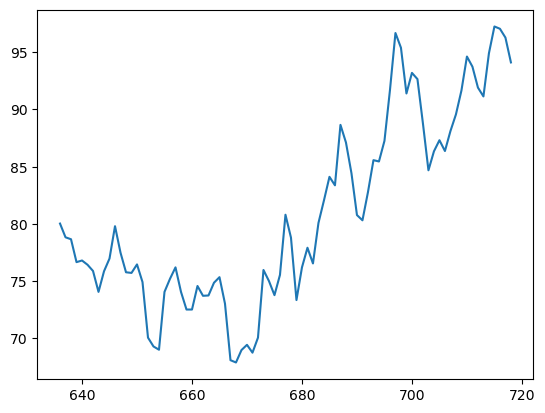

87
[]


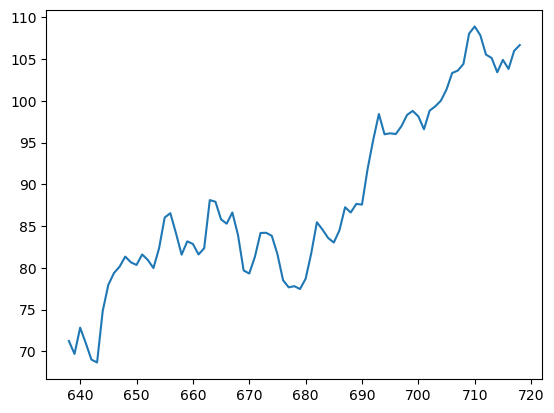

88
[712]


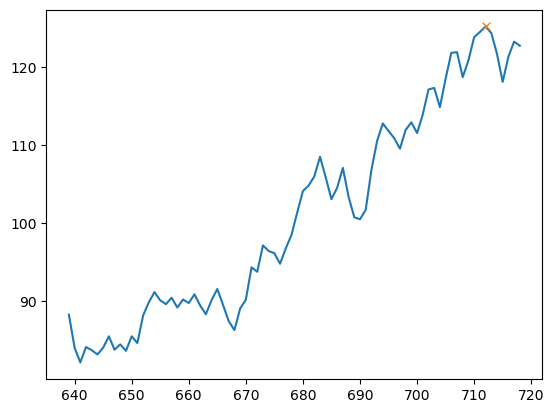

89
[]


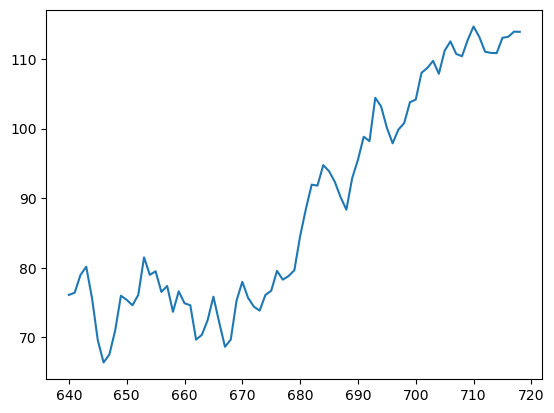

90
[]


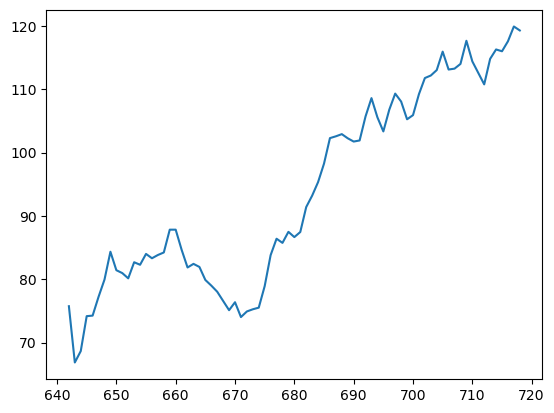

91
[]


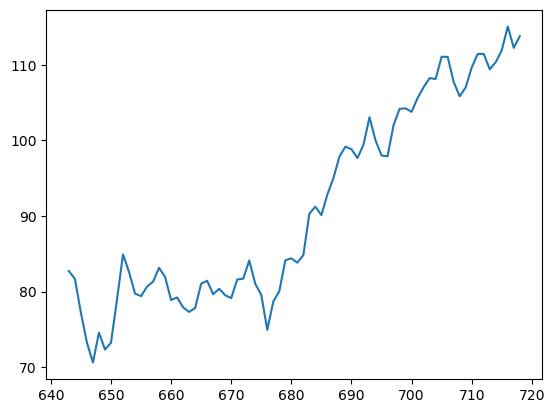

92
[]


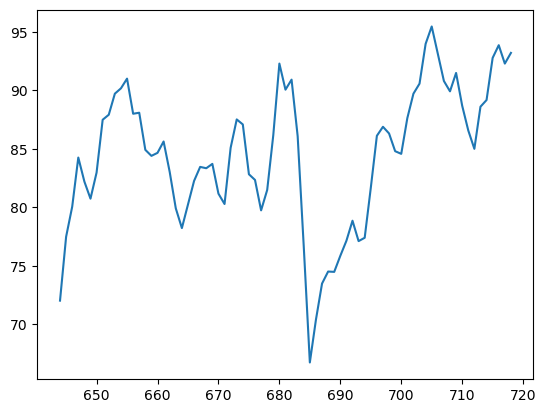

93
[]


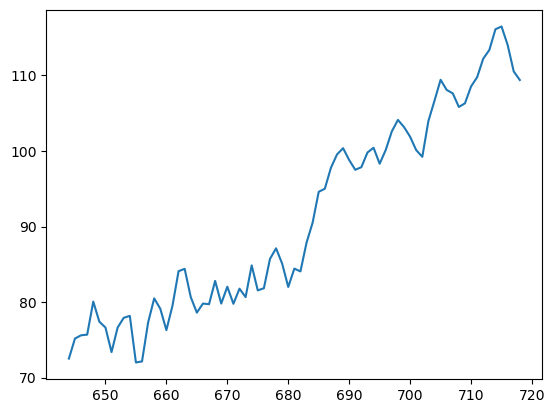

94
[]


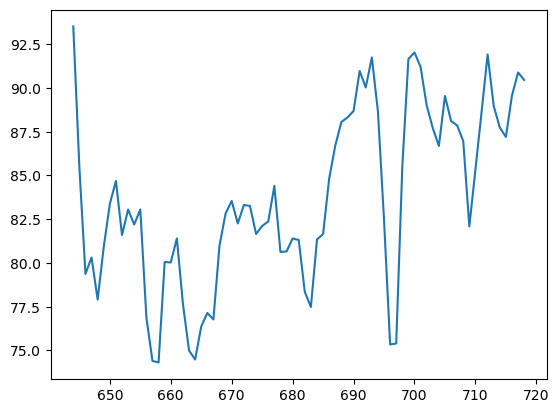

95
[]


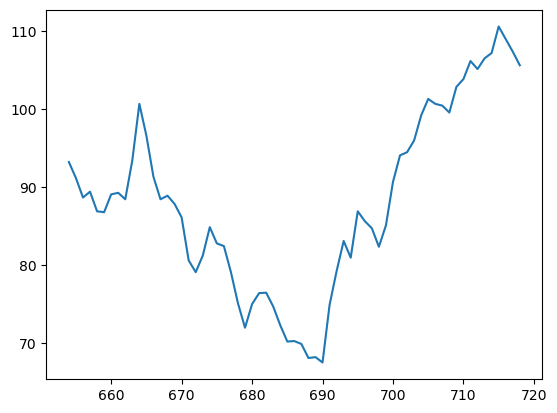

96
[]


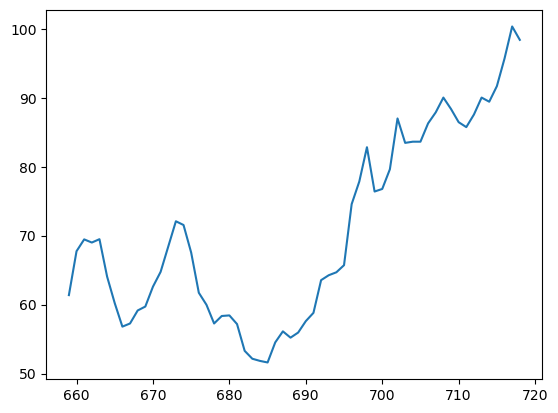

97
[]


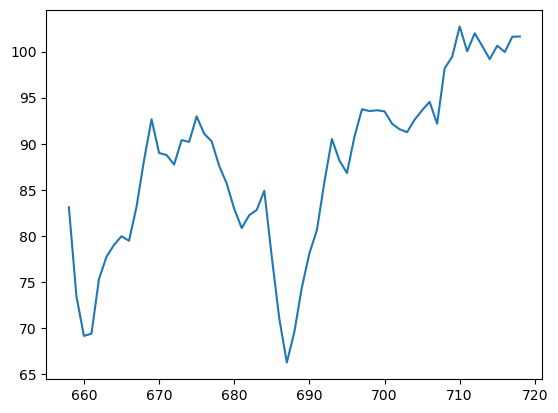

98
[]


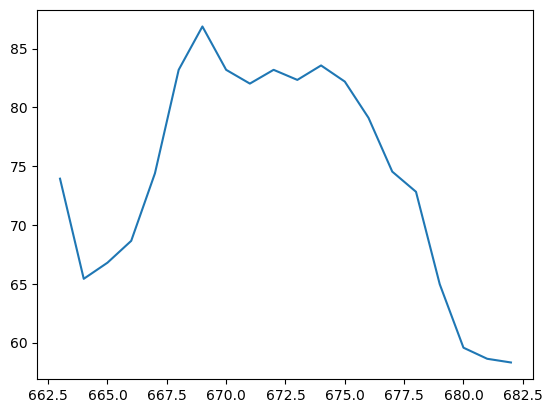

99
[]


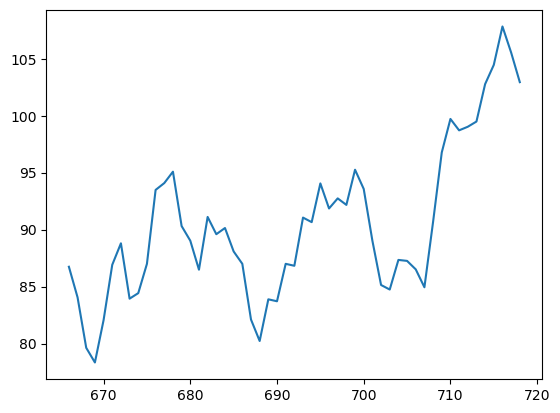

100
[]


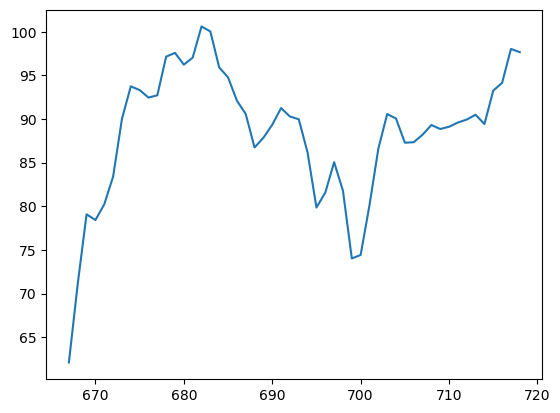

101
[]


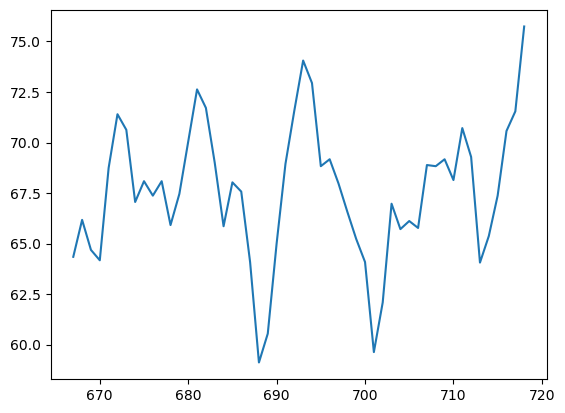

102
[]


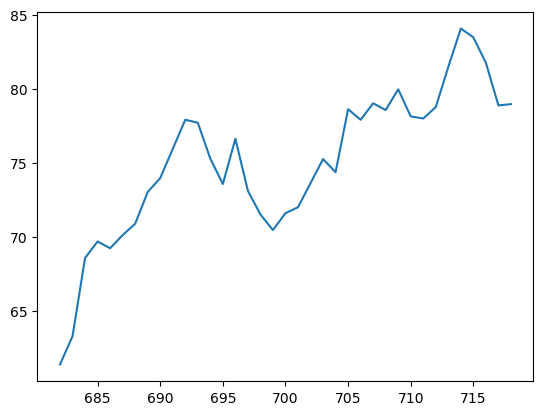

103
[]


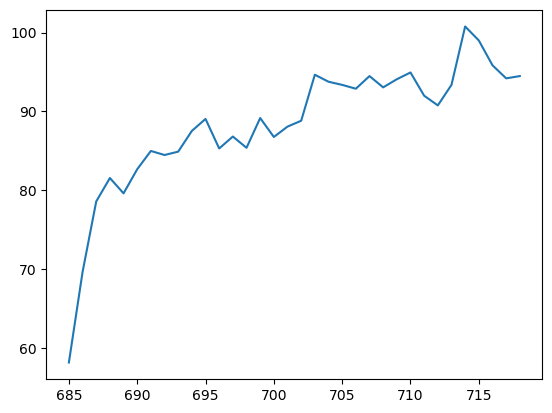

104
[]


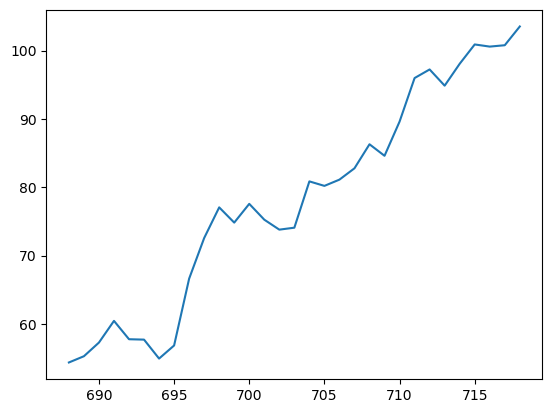

105
[]


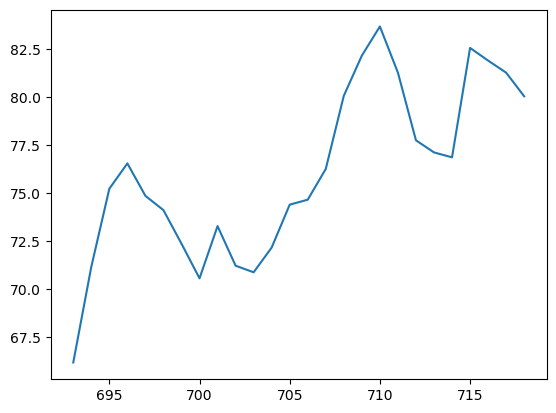

106
[]


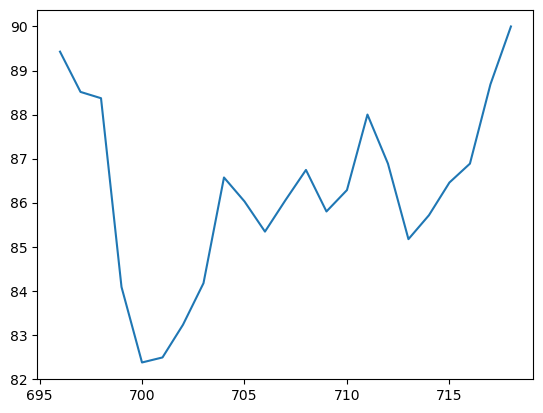

107
[]


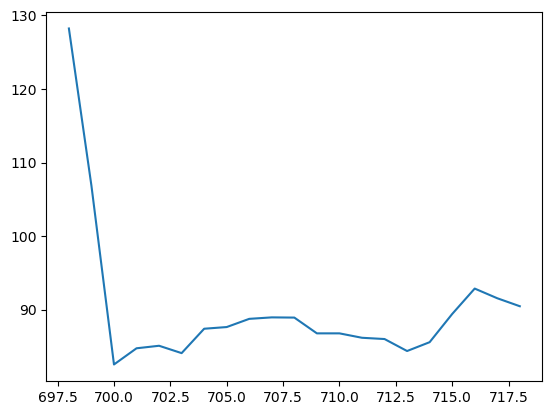

108
[]


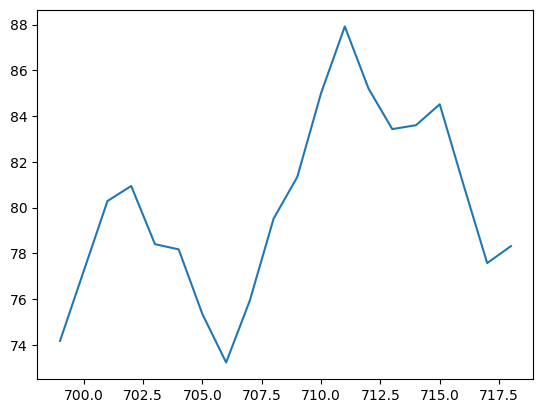

109
[]


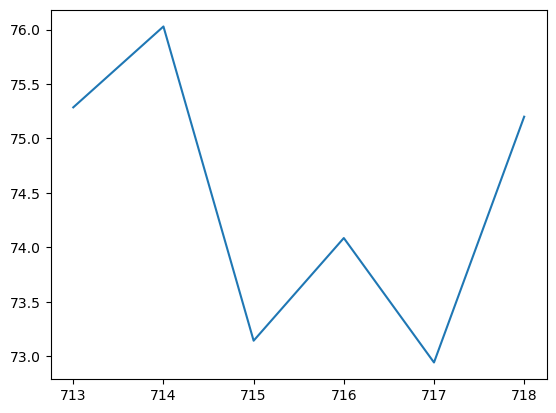

110
[]


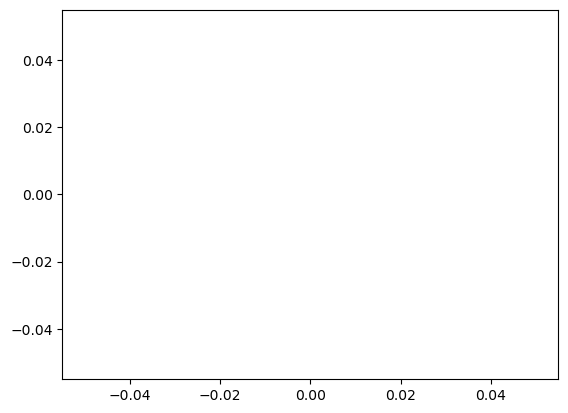

111
[]


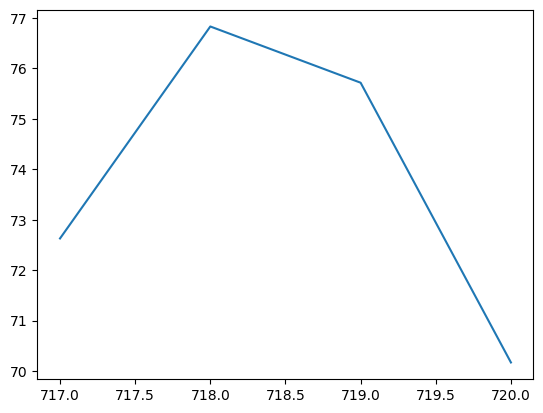

In [11]:
#核面積のデータのピークを検出 by Scipy peak detection
for i in df_2["cell_id"].unique():
    data_tmp = df_2[df_2["cell_id"]==i].reset_index(drop=True)
    x = data_tmp["time"].reset_index(drop=True)
    y = data_tmp["sav"].reset_index(drop=True)
    plt.plot(x,y)
    print(i)
    
    peaks, _ = find_peaks(y, distance=120)
    list_tmp = []
    for l in peaks:
        if data_tmp["sav"][data_tmp["time"]==l].values > 120:
            list_tmp.append(l)
    print(list_tmp)
    
    plt.plot(list_tmp, y[list_tmp], "x")
    plt.show()

sav  time       c/n  cell_id  time_reset
0     161.885714   121  1.116435        0           0
1     140.457143   122  1.024866        0           1
2     101.685714   123  1.033554        0           2
3      67.171429   124  1.054478        0           3
4      73.800000   125  0.917800        0           4
...          ...   ...       ...      ...         ...
4312  122.914286   706  0.871491       47         140
4313  123.114286   707  0.897718       47         141
4314  124.514286   708  0.877262       47         142
4315  124.142857   709  0.828748       47         143
4316  124.828571   710  0.839346       47         144

[4317 rows x 5 columns]

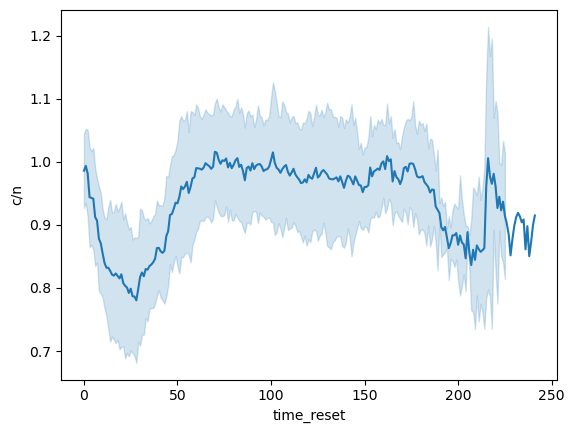

In [12]:
df_3 = pd.DataFrame()
for i in df_2["cell_id"].unique():
    data_tmp = df_2[df_2["cell_id"]==i].reset_index(drop=True)
    x = data_tmp["time"].reset_index(drop=True)
    y = data_tmp["sav"].reset_index(drop=True)
    
    peaks, _ = find_peaks(y, distance=120)
    list_tmp = []
    for l in peaks:
        if data_tmp["sav"][data_tmp["time"]==l].values > 120:
            list_tmp.append(l)
    #print(list_tmp)
    
    if len(list_tmp) > 1:
        df_tmp = data_tmp.loc[list_tmp[0]:list_tmp[1],["sav","time","c/n","cell_id"]]
        t = df_tmp['time'].nunique()
        df_tmp["time_reset"] = np.arange(t)
        df_3 = pd.concat([df_3,df_tmp])
    
df_4 = df_3.reset_index(drop=True)
display(df_4)
sns.lineplot(data=df_4, x="time_reset", y="c/n", errorbar="sd")
#plt.show()
plt.savefig("20231017-PKAKTR-SK186-1.pdf")

sav  time       c/n  cell_id        cyto  cyto_norm  time_reset
0     161.885714   121  1.116435        0  830.250549   1.000000           0
1     140.457143   122  1.024866        0  830.334229   1.000101           1
2     101.685714   123  1.033554        0  877.421692   1.056816           2
3      67.171429   124  1.054478        0  892.231873   1.074654           3
4      73.800000   125  0.917800        0  835.107483   1.005850           4
...          ...   ...       ...      ...         ...        ...         ...
4312  122.914286   706  0.871491       47  885.539062   0.836649         140
4313  123.114286   707  0.897718       47  921.538696   0.870661         141
4314  124.514286   708  0.877262       47  914.406311   0.863923         142
4315  124.142857   709  0.828748       47  872.391479   0.824228         143
4316  124.828571   710  0.839346       47  869.640625   0.821629         144

[4317 rows x 7 columns]

<Axes: xlabel='time_reset', ylabel='cyto_norm'>

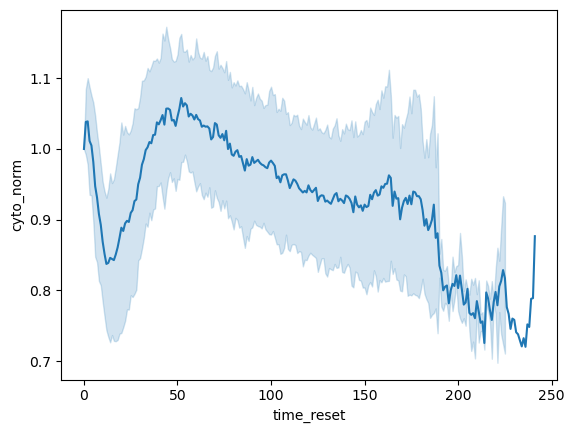

In [13]:
#quantification of the expression level of spPKA-KTR1.0

df_3 = pd.DataFrame()
for i in df_2["cell_id"].unique():
    data_tmp = df_2[df_2["cell_id"]==i].reset_index(drop=True)
    x = data_tmp["time"].reset_index(drop=True)
    y = data_tmp["sav"].reset_index(drop=True)
    
    peaks, _ = find_peaks(y, distance=120)
    list_tmp = []
    for l in peaks:
        if data_tmp["sav"][data_tmp["time"]==l].values > 120:
            list_tmp.append(l)
    #print(list_tmp)
    
    if len(list_tmp) > 1:
        df_tmp = data_tmp.loc[list_tmp[0]:list_tmp[1],["sav","time","c/n","cell_id","cyto"]]
        tmp_cyto_notna = df_tmp["cyto"][df_tmp["cyto"].notna()].reset_index(drop=True)
        #print(tmp_cyto_notna)
        df_tmp["cyto_norm"] = df_tmp["cyto"]/tmp_cyto_notna[0]
        t = df_tmp['time'].nunique()
        df_tmp["time_reset"] = np.arange(t)
        df_3 = pd.concat([df_3,df_tmp])
    
df_4 = df_3.reset_index(drop=True)
display(df_4)



sns.lineplot(data=df_4, x="time_reset", y="cyto_norm", errorbar="sd")
#plt.show()
#plt.savefig("20231017-PKAKTR-SK186-cyto-1.pdf")

241


0         1         2         3         4         5         6  \
0   0.951360  0.974339  0.995266  0.858183  0.866193  0.937202  0.900130   
1   1.077547  0.985987  0.987284  1.034607  1.016975  0.934497  0.883729   
2   1.006297  0.988122  0.979733  0.914301  0.898504  0.951670  0.899238   
3   0.994933  1.041560  1.097059  0.989935  0.869953  0.966693  0.994973   
4   0.960118  0.993538  1.035419  1.080300  1.059698  1.061306  0.989676   
5   0.911989  0.899598  0.860032  0.874620  0.899929  0.831773  0.856768   
6   0.890082  0.970447  0.921564  0.964646  0.978110  0.973154  0.909795   
7   0.992827  0.947679  0.917441  1.033525  1.006131  0.892148  0.904458   
8   0.847086  0.865952  0.908974  0.841475  0.986408  0.943043  0.941288   
9   0.966906  1.066419  1.040487  1.002408  0.987013  0.840810  0.782449   
10  1.022283  1.105941  1.045252  1.046909  1.051369  1.106486  1.091740   
11  1.028766  1.030679  1.068811  0.905292  0.844889  1.136642  1.033615   
12  1.058092  0.962227  1.051616  1.076120  1.060076  0.998947  0.930660   
13  1.049008  1.052883  1.034931  0.981489  1.033302  0.971076  1.025928   
14  0.937837  0.946968  0.915073  0.868030  0.783030  0.823782  0.762235   
15  0.974213  0.970719  0.973457  0.801579  0.853698  0.847700  0.823273   
16  1.116435  1.024866  1.033554  1.054478  0.917800  0.887273  0.884037   
17  0.961037  1.001199  0.891161  0.883906  0.915099  0.921481  0.814315   
18  1.038313  1.074733  1.044156  0.912975  0.983262  0.948225  0.884930   
19  1.045861  1.095805  1.081052  0.931907  0.958589  0.995439  0.907976   
20  0.973447  1.017789  0.937821  0.897985  0.922362  0.933289  0.932958   
21  0.945644  0.927543  1.031779  0.972082  0.859745  0.843234  0.890628   
22  0.963841  1.022139  0.915456  0.821302  0.929107  1.008682  0.985690   
23  0.959224  0.927549  0.914666  0.917283  0.879067  0.869927  0.848267   
24  0.991567  0.960472  0.936555  0.919980  0.952342  0.888280  0.884426   
25  0.969602  0.977404  0.896111  0.957125  0.998084  0.968480  0.953299   

           7         8         9  ...      233       234       235      236  \
0   0.879660  0.836316  0.873015  ...  0.91347  0.904094  0.908598  0.86121   
1   0.820966  0.840899  0.873774  ...      NaN       NaN       NaN      NaN   
2   0.877963  0.884113  0.857090  ...      NaN       NaN       NaN      NaN   
3   1.027353  1.020044  0.975879  ...      NaN       NaN       NaN      NaN   
4   0.980544  0.966131  0.897476  ...      NaN       NaN       NaN      NaN   
5   0.827046  0.808279  0.782632  ...      NaN       NaN       NaN      NaN   
6   0.925752  0.888404  0.844993  ...      NaN       NaN       NaN      NaN   
7   0.884108  0.809007  0.807719  ...      NaN       NaN       NaN      NaN   
8   0.946781  0.923372  0.833763  ...      NaN       NaN       NaN      NaN   
9   0.911328  0.857586  0.877135  ...      NaN       NaN       NaN      NaN   
10  1.009389  1.073896  1.121938  ...      NaN       NaN       NaN      NaN   
11  0.909795  0.872035  0.884155  ...      NaN       NaN       NaN      NaN   
12  0.907108  0.861481  0.829466  ...      NaN       NaN       NaN      NaN   
13  1.023936  0.968692  0.980198  ...      NaN       NaN       NaN      NaN   
14  0.859198  0.734211  0.783651  ...      NaN       NaN       NaN      NaN   
15  0.822370  0.779158  0.775254  ...      NaN       NaN       NaN      NaN   
16  0.927997  0.902127  0.907754  ...      NaN       NaN       NaN      NaN   
17  0.821392  0.819917  0.817852  ...      NaN       NaN       NaN      NaN   
18  0.826054  0.832735  0.908091  ...      NaN       NaN       NaN      NaN   
19  1.002917  1.055536  0.999951  ...      NaN       NaN       NaN      NaN   
20  0.990689  0.913023  0.876443  ...      NaN       NaN       NaN      NaN   
21  0.873281  0.862836  0.829483  ...      NaN       NaN       NaN      NaN   
22  0.892769  0.776717  0.772901  ...      NaN       NaN       NaN      NaN   
23  0.824675  0.843935  0.811200  ...      NaN       NaN      

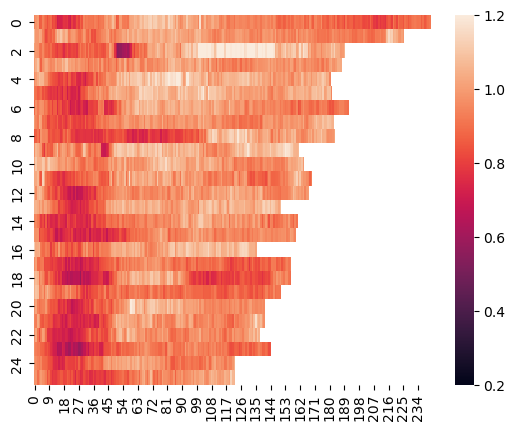

In [17]:
print(df_4["time_reset"].max())

df_heat =  pd.DataFrame()
for i in df_4["cell_id"].unique():
    df_tmp =  df_4["c/n"][df_4["cell_id"]==i].reset_index(drop=True)
    df_heat = pd.concat([df_heat,df_tmp],axis=1)
df_T = df_heat.T
#display(df_T)

heat_sort = df_T
heat_sort["sum"] = df_T.sum(axis=1)
heat_sort = heat_sort.sort_values("sum",ascending=False).reset_index(drop=True)
display(heat_sort)

sns.heatmap(heat_sort.iloc[:,:-1],vmax=1.2,vmin=0.2)
plt.savefig("20231017-PKAKTR-SK186-2.pdf")

In [32]:
heat_sort.count(axis=1).min()

124

0         1         2         3         4         5        6  \
0   0.95136  0.974339  0.995266  0.858183  0.866193  0.937202  0.90013   
1       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
5       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
6       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
7       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
8       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
9       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
10      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
11      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
12      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
13      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
14      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
15      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
16      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
17      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
18      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
19      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
20      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
21      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
22      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
23      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
24      NaN       NaN       NaN       NaN       NaN       NaN      NaN   
25      NaN       NaN       NaN       NaN       NaN       NaN      NaN   

          7         8         9  ...       233       234       235       236  \
0   0.87966  0.836316  0.873015  ...  0.913470  0.904094  0.908598  0.861210   
1       NaN       NaN       NaN  ...  1.111808  1.127917  1.043603  1.056861   
2       NaN       NaN       NaN  ...  1.109825  1.069798  1.123512  1.045924   
3       NaN       NaN       NaN  ...  0.940424  1.010213  1.030105  0.973840   
4       NaN       NaN       NaN  ...  1.014811  1.075489  1.057560  1.081445   
5       NaN       NaN       NaN  ...  1.066946  1.085093  1.056234  1.119652   
6       NaN       NaN       NaN  ...  0.895305  0.895447  0.914031  0.942930   
7       NaN       NaN       NaN  ...  1.042113  1.043062  1.098124  1.059389   
8       NaN       NaN       NaN  ...  1.102992  1.037233  1.046247  0.994419   
9       NaN       NaN       NaN  ...  1.195900  1.172894  1.169710  1.135759   
10      NaN       NaN       NaN  ...  1.034205  1.004965  1.022071  1.017714   
11      NaN       NaN       NaN  ...  1.034940  1.105872  1.007842  0.980672   
12      NaN       NaN       NaN  ...  1.042658  1.010532  0.981549  1.007033   
13      NaN       NaN       NaN  ...  1.111175  1.126921  1.066360  1.121253   
14      NaN       NaN       NaN  ...  0.954173  0.973385  0.930693  0.997867   
15      NaN       NaN       NaN  ...  0.971172  0.968995  0.979713  0.933665   
16      NaN       NaN       NaN  ...  1.148506  1.135014  1.141477  1.106596   
17      NaN       NaN       NaN  ...  0.858837  0.879153  0.901049  0.843315   
18      NaN       NaN       NaN  ...  0.991339  0.957619  0.984948  0.939412   
19      NaN       NaN       NaN  ...  0.932369  0.876993  0.906487  0.891719   
20      NaN       NaN       NaN  ...  1.004926  0.951279  0.962086  0.946549   
21      NaN       NaN       NaN  ...  1.050319  0.999722  1.072199  1.168513   
22      NaN       NaN       NaN  ...  0.989862  0.996225  1.062797  1.040336   
23      NaN       NaN       NaN  ...  0.905336  0.944561  0.915427  0.865211   
24      NaN

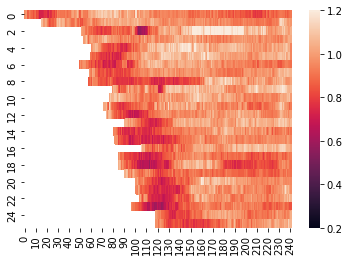

In [21]:
heat_sort_2 = heat_sort.drop('sum', axis=1).reset_index(drop=True)
#display(heat_sort_2)
heat_sort_3 = pd.DataFrame()
for i in range(26):
    #NaNを消す
    data_tmp = heat_sort_2.iloc[i]
    NaN_count = data_tmp.isnull().sum()
    data_tmp_dr =  data_tmp.dropna(how='any')
    
    #NaNを挿入する
    df_NaN = pd.DataFrame(np.zeros((NaN_count, 1)))
    df_NaN[:] = np.nan
    data_tmp_dr = pd.concat([df_NaN,data_tmp_dr]).reset_index(drop=True).T
    
    heat_sort_3 = pd.concat([heat_sort_3,data_tmp_dr]).reset_index(drop=True)
#display(heat_sort_3)

heat_sort_3["sum"] = heat_sort_3.sum(axis=1)
display(heat_sort_3)
heat_sort_3 = heat_sort_3.sort_values("sum",ascending=False)

sns.heatmap(heat_sort_3.iloc[:,:-1],vmax=1.2,vmin=0.2)
plt.savefig("20231017-PKAKTR-SK186-3.pdf")